# **Optimizing Bank Marketing Campaigns: Predicting Term Deposit Subscriptions with F1-Score**

Untuk dashboard bisa di akses melalui Looker studio [Link](https://lookerstudio.google.com/u/0/reporting/8bb67993-75b5-4417-bb0e-a285249a94b5/page/p_gf5cymg1td/edit?hl=en)

Untuk Streamlit bisa diakses melalui [Link](https://app-prediction-delta-jcds-jogja.streamlit.app)

# **Define Problem**

## **Business Understanding**

Produk Deposito dan Konteks Bisnis
Produk deposito berjangka merupakan sumber pendanaan krusial bagi bank, menawarkan pengembalian stabil bagi nasabah dan margin keuntungan (Net Interest Margin/NIM) bagi bank dari selisih bunga pinjaman dan deposito. Salah satu metode pemasaran yang umum digunakan adalah telemarketing, di mana pihak bank menghubungi database nasabah untuk menawarkan produk deposito.

## **Konteks**

Dataset ini berasal dari kampanye pemasaran langsung melalui panggilan telepon oleh sebuah bank di Portugal antara tahun 2008 hingga 2010, periode pemulihan pasca-krisis finansial global. Tujuannya adalah mendorong nasabah untuk berlangganan deposito berjangka, sumber pendanaan jangka panjang yang stabil. Dataset berisi **41.188 baris** data dan **21 fitur**, meliputi demografi (`age`, `job`, `education`), detail kontak (`contact`, `month`, `day_of_week`, `duration`), riwayat kampanye (`pdays`, `previous`, `poutcome`), indikator makroekonomi (`emp.var.rate`, `euribor3m`, `cons.conf.idx`), dan target (`y`: yes/no untuk langganan deposito). Sumber.

Dataset memiliki **ketidakseimbangan kelas** (~11% `y=yes`), memerlukan teknik seperti Resampling dan metrik seperti Recall dan Precision serta F1-Score. Fitur **duration** harus dihapus untuk mencegah **data leakage**, karena hanya tersedia pasca-kampanye.

## **Stakeholder**

**Tim pemasaran bank**, yang merancang dan melaksanakan kampanye telemarketing, sebagai stakeholder utama. Stakeholder sekunder adalah **manajemen bank**, yang fokus pada pendapatan dan efisiensi, serta **tim data science**, yang mengembangkan model prediktif.

## **Pernyataan Masalah**
Tim pemasaran menghadapi tantangan dalam meningkatkan efektivitas kampanye telemarketing untuk deposito berjangka, dengan  Tingkat konversi telemarketing manual hanya 11.8%, yang berarti sebagian besar upaya panggilan berakhir tanpa pembukaan akun deposito. Ini mengindikasikan pemborosan waktu, tenaga, dan biaya marketing yang substansial. Dengan anggaran marketing yang terbatas, Bank Novobanco perlu cara yang lebih cerdas dan efisien untuk mengidentifikasi nasabah potensial dan menghindari panggilan yang tidak produktif.

## **Tujuan dan Sasaran**

1. Analisis Gambaran Umum: Mendapatkan pemahaman mendalam tentang kampanye telemarketing yang telah berjalan, mencakup demografi nasabah dan kondisi sosio-ekonomi makro.

2. Identifikasi Nasabah Potensial: Mengembangkan model untuk memprediksi nasabah mana yang paling potensial untuk membuka deposito.

3. Optimalisasi Anggaran Marketing: Tujuan utama adalah meningkatkan profit dari anggaran marketing yang terbatas, sekaligus menghemat waktu dan tenaga kerja yang dapat dialihkan ke program lain.

## **Analytical Approach**

**Variabel Target**

0: Nasabah tidak membuka deposito (No).

1: Nasabah membuka deposito (Yes).

Konteks Biaya dan Potensi Keuntungan
Untuk memahami dampak finansial, kita perlu mempertimbangkan biaya operasional dan potensi pendapatan:

**Rata-rata Upah Pekerja Portugal (2008-2013):**

- Minimum: 545.67 Euro/bulan

- Rata-rata: 1737.85 Euro/bulan (setara 0.0525 Euro/menit biaya tenaga kerja per panggilan)

- Biaya Telepon per Menit: 0.076 Euro

- Median Durasi Panggilan: 3 menit

- Rata-rata NIM Bank Portugal (2008-2013): 1.38%

- Estimasi Nilai Deposito Per Nasabah: 2919.56 Euro (berdasarkan asumsi 14% dari gaji tahunan diinvestasikan ke deposito).

## **Evaluasi Metriks**

Dalam konteks ini, kita akan fokus pada metrik yang menyeimbangkan antara identifikasi nasabah yang benar-benar akan membuka deposito dan minimisasi kesalahan prediksi yang merugikan.

**True Positive (TP)**: Nasabah diprediksi deposito dan benar-benar deposito.

**False Positive (FP**): Nasabah diprediksi deposito, tapi tidak deposito.

**True Negative (TN)**: Nasabah diprediksi tidak deposito dan benar tidak deposito.

**False Negative (FN)**: Nasabah diprediksi tidak deposito, tapi ternyata deposito.

## **Analisis Error dan Dampak Finansial**:

**Type 1 Error (False Positive - FP):**

- **Deskripsi**: Memprediksi nasabah akan membuka deposito, padahal tidak.

- **Konsekuensi**: Kerugian biaya telemarketing (waktu dan tenaga kerja yang terbuang), serta potensi ketidaknyamanan nasabah.

**Estimasi Kerugian per FP:**

- **Biaya Telepon**: 0.076 Euro/menit * 3 menit = 0.228 Euro

- **Biaya Tenaga Kerja**: 0.0525 Euro/menit * 3 menit = 0.158 Euro

- **Total Kerugian per FP**: ≈ 0.39 Euro/nasabah

**Type 2 Error (False Negative - FN):**

- **Deskripsi**: Memprediksi nasabah tidak akan membuka deposito, padahal sebenarnya akan deposito.

- **Konsekuensi**: Kehilangan potensi pendapatan (opportunity cost) dari nasabah yang sebenarnya potensial.

- **Estimasi Kerugian per FN:**

- **Potensi Pendapatan**: Estimasi Deposito * NIM = 2919.56 Euro * 1.38% = 40.28 Euro/nasabah

**Prioritas Metrik: F1-Score**

Meskipun Type 2 Error (FN) memiliki konsekuensi finansial yang jauh lebih besar ($40.28 vs $0.39), namun fokus mutlak pada Recall dapat menyebabkan terlalu banyak False Positive (FP), yang akan membuang-buang biaya marketing dan tenaga kerja, bertentangan dengan tujuan efisiensi. Sebaliknya, fokus mutlak pada Precision akan meminimalkan FP, tetapi berisiko tinggi mengabaikan banyak nasabah potensial (FN).

Oleh karena itu, F1-Score adalah metrik yang paling tepat untuk proyek ini. F1-Score adalah rata-rata harmonis dari Precision dan Recall, yang memastikan bahwa model berkinerja baik pada kedua aspek tersebut. Ini akan membantu menyeimbangkan antara mengidentifikasi nasabah potensial (Recall tinggi) dan memastikan sebagian besar prediksi positif akurat (Precision tinggi), sehingga mengoptimalkan penggunaan anggaran marketing yang terbatas untuk profit yang lebih besar.


# **Data Understanding**

Memahami struktur, isi, dan karakteristik dataset **bank-additional-full.csv** untuk mendukung tujuan proyek, yaitu meningkatkan tingkat konversi kampanye pemasaran deposito berjangka dari 11% ke 20%, mengurangi biaya kampanye 30%, dan meminimalkan False Negatives (€45 per nasabah terlewat) melalui penargetan 50% nasabah berprobabilitas tinggi. Pemahaman ini menghubungkan fitur data dengan masalah bisnis (konversi rendah, ROI rendah) dan menentukan langkah preprocessing serta analisis lanjutan untuk mencapai metrik Recall ≥85% dan F2-Score ≥80%.

## Library

In [4]:
# ========== Sistem & Konfigurasi ==========
import os
import warnings
import joblib
import pickle
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
os.environ['LIGHTGBM_VERBOSITY'] = '-1'

# ========== Data Manipulasi ==========
import numpy as np
import pandas as pd

# ========== Visualisasi ==========
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

# ========== Statistik ==========
from scipy import stats
from scipy.stats import (
    uniform, randint, shapiro, kstest, anderson, chi2_contingency, normaltest
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ========== Preprocessing ==========
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, OneHotEncoder,
    OrdinalEncoder, LabelEncoder, PolynomialFeatures
)
from sklearn.impute import (
    SimpleImputer, IterativeImputer, KNNImputer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils import resample
import category_encoders as ce
from category_encoders import BinaryEncoder

# ========== Feature Selection ==========
from sklearn.feature_selection import (
    SelectKBest, f_classif, SelectFromModel, SelectPercentile
)
from sklearn.decomposition import PCA

# ========== Model Selection & CV ==========
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, KFold,
    cross_val_score, cross_validate,
    GridSearchCV, RandomizedSearchCV
)

# ========== Model Evaluation ==========
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, confusion_matrix, classification_report,
    make_scorer, precision_recall_curve
)

# ========== Imbalanced Handling ==========
from imblearn.over_sampling import (
    SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler, SMOTENC
)
from imblearn.under_sampling import (
    RandomUnderSampler, TomekLinks, EditedNearestNeighbours,
    NearMiss, OneSidedSelection
)
from imblearn.combine import SMOTEENN

# ========== Machine Learning Models ==========
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, VotingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# ========== JCOPML Support ==========
from jcopml.utils import save_model, load_model
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp


## Load Dataset

In [3]:
df = pd.read_csv("./Data/bank-additional-full.csv", encoding='utf-8', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Feature Explenation

### **Column Target**

| Kolom | Penjelasan |
| ----- | ----- |
| `y`   | **Target/output** → apakah klien berlangganan deposito berjangka (binary: `yes` atau `no`). Fokus klasifikasi model nantinya ada di sini. |

### **Data Sosial-Ekonomi Nasabah**

| Kolom       | Penjelasan  |
| ----------- | ----------- |
| `age`       | Usia klien (numerik). Bisa dipakai buat segmentasi umur atau cluster usia tertentu. |
| `job`       | Jenis pekerjaan klien, seperti admin., technician, entrepreneur, dll. Ini **kategori sosial ekonomi** yang bisa memengaruhi keputusan finansial. |
| `marital`   | Status pernikahan (`married`, `single`, `divorced`). Terkait stabilitas dan kebiasaan keuangan. |
| `education` | Tingkat pendidikan: `basic`, `high.school`, `university`, `professional.course`, dll. |
| `default`   | Apakah klien punya kredit macet sebelumnya (`yes`/`no`). Bisa indikasi risiko. |
| `housing`   | Apakah klien memiliki kredit rumah (`yes`/`no`). |
| `loan`      | Apakah klien punya pinjaman pribadi (`yes`/`no`). |

### **Informasi Kontak dan Kampanye**

| Kolom         | Penjelasan  |
| ----------    | ----------  |
| `contact`     | Jenis komunikasi yang digunakan saat kampanye: `cellular`, `telephone`.           |
| `month`       | Bulan terakhir klien dihubungi (dalam kampanye terakhir): `jan`, `feb`, … `dec`.  |
| `day_of_week` | Hari dalam seminggu saat kontak dilakukan (`mon`–`fri`). Bisa lihat tren waktu.   |
| `duration`    | Lama durasi kontak terakhir dalam detik. |

### **Informasi Kampanye**

| Kolom      | Penjelasan |
| ---------- | ---------- |
| `campaign` | Jumlah kontak selama kampanye marketing terakhir (numerik). |
| `pdays`    | Jumlah hari sejak klien terakhir kali dihubungi oleh kampanye sebelumnya. Jika belum pernah, nilainya `999`. |
| `previous` | Berapa kali klien telah dihubungi dalam kampanye sebelumnya. |
| `poutcome` | Hasil dari kampanye marketing sebelumnya: `success`, `failure`, `nonexistent`. |

### **Indikator Ekonomi Makro (saat kampanye)**

| Kolom            | Penjelasan                                                            |
| ---------------- | --------------------------------------------------------------------- |
| `emp.var.rate`   | Tingkat variasi lapangan kerja (indikator ekonomi, biasanya bulanan). |
| `cons.price.idx` | Indeks harga konsumen (inflasi).                                      |
| `cons.conf.idx`  | Indeks kepercayaan konsumen.                                          |
| `euribor3m`      | Suku bunga EURIBOR 3 bulan (referensi suku bunga pasar Eropa).        |
| `nr.employed`    | Jumlah karyawan rata-rata (indikator ekonomi umum).                   |

### **Ringkasan**

* **Variabel target:** `y`
* **Fitur personal:** `age`, `job`, `marital`, `education`, `default`, `housing`, `loan`
* **Fitur kampanye marketing:** `contact`, `month`, `day_of_week`, `duration`, `campaign`, `pdays`, `previous`, `poutcome`
* **Fitur ekonomi makro:** `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`


## Missing Value

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Tidak ada Missing Value**

## Duplicated Data

In [6]:
df.duplicated().sum()

np.int64(12)

**Terdapat 12 Duplicated data**

## Target Class Distribution

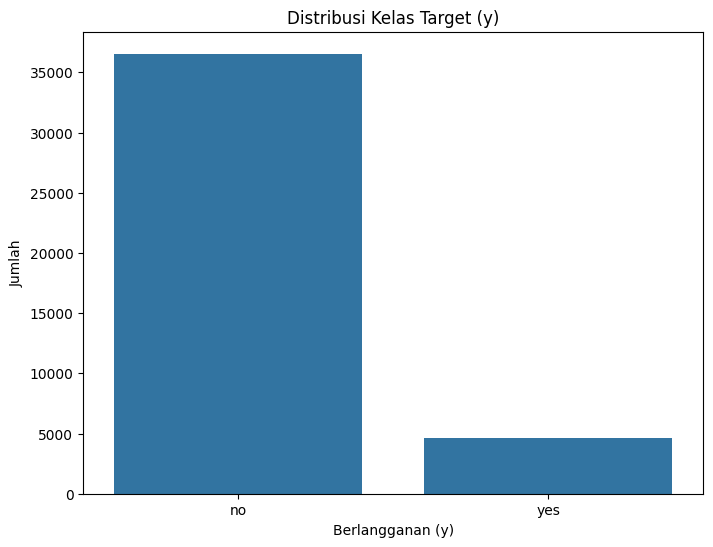


Proporsi Kelas Target:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Distribusi Kelas Target (y)')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Jumlah')
plt.show()
print("\nProporsi Kelas Target:")
print(df['y'].value_counts(normalize=True))

Kelas target `y` sangat tidak seimbang (~11.3% `yes`, ~88.7% `no`), memerlukan teknik seperti SMOTE dan metrik Recall untuk evaluasi model.

## Unknown Check

In [8]:
df.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [9]:
print("\nProporsi Nilai 'unknown':")
for col in ['job', 'education', 'default', 'housing', 'loan', 'poutcome']:
    unknown_prop = df[col].value_counts(normalize=True).get('unknown', 0)
    print(f"{col}: {unknown_prop:.4f}")


Proporsi Nilai 'unknown':
job: 0.0080
education: 0.0420
default: 0.2087
housing: 0.0240
loan: 0.0240
poutcome: 0.0000


Nilai "unknown" signifikan di `poutcome` (~86%) dan `default` (~21%), menunjukkan perlunya imputasi atau penghapusan di tahap preprocessing.

## Analisis Deskriptif

In [10]:
print("\nStatistik Deskriptif Numerik:")
print(df.describe())
print("\nDistribusi Fitur Kategorikal:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts(normalize=True))


Statistik Deskriptif Numerik:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960    

## Numeric Data

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Count Numeric Column

In [12]:
len(df.select_dtypes(include = 'number').columns)

10

### Normality Test

In [13]:
def check_normality(df):
    def test_normality(df):
        shapiro_p = shapiro(df).pvalue
        ks_p = kstest(df, 'norm').pvalue
        anderson_result = anderson(df)
        ad_result = anderson_result.statistic < anderson_result.critical_values[2] #using 5% critical value

        return {
            'Shapiro-Wilk': 'Normal' if shapiro_p > 0.05 else 'Not-normal',
            'Kolmogorov-Smirnov': 'Normal' if ks_p > 0.05 else 'Not-normal',
            'Anderson-Darling': 'Normal' if ad_result else 'Not-normal'
        }

    numeric_cols = df.select_dtypes(include=["number"]).columns
    results = {col: test_normality(df[col]) for col in numeric_cols}
    return pd.DataFrame.from_dict(results, orient='index').rename_axis('Feature')

normality_results = check_normality(df)
normality_results

,Shapiro-Wilk,Kolmogorov-Smirnov,Anderson-Darling
Feature,,,
age,Not-normal,Not-normal,Not-normal
duration,Not-normal,Not-normal,Not-normal
campaign,Not-normal,Not-normal,Not-normal
pdays,Not-normal,Not-normal,Not-normal
previous,Not-normal,Not-normal,Not-normal
emp.var.rate,Not-normal,Not-normal,Not-normal
cons.price.idx,Not-normal,Not-normal,Not-normal
cons.conf.idx,Not-normal,Not-normal,Not-normal
euribor3m,Not-normal,Not-normal,Not-normal


Diketahui bahwa seluruh variabel numerik tidak berdistribusi normal.

#### Data Distribution

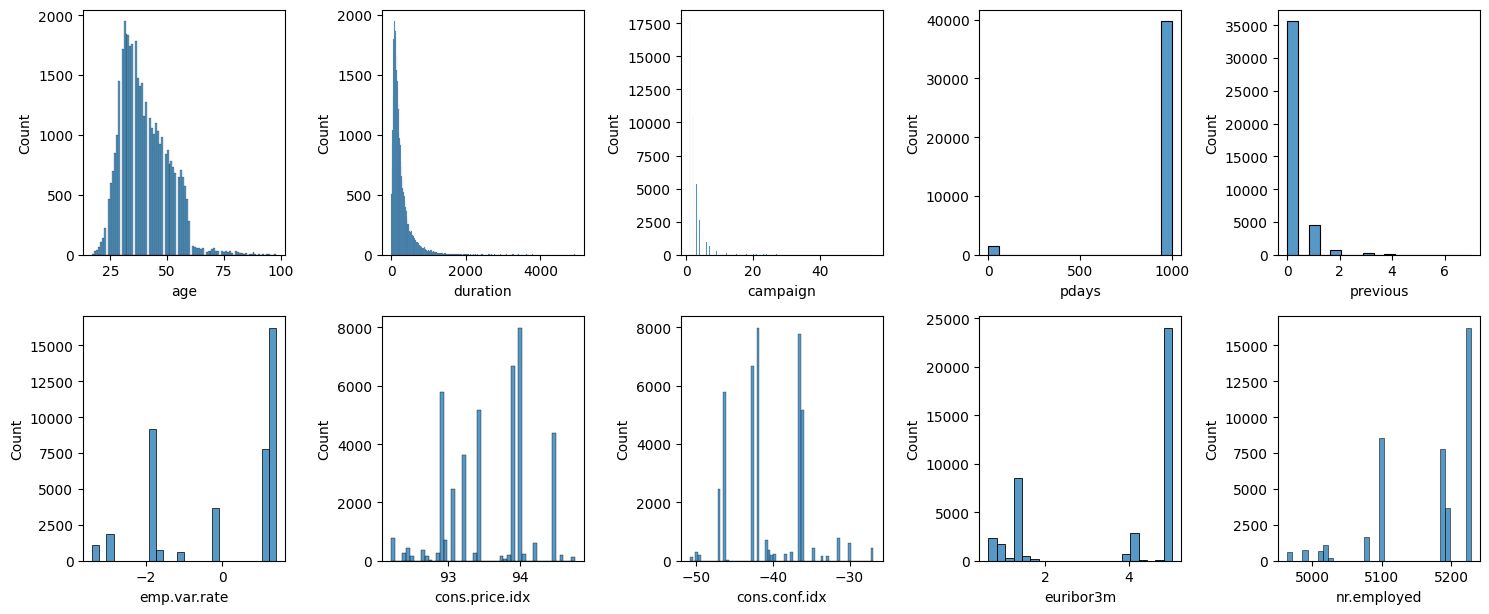

In [14]:
numeric = df.select_dtypes(include = 'number')

# change the size of the frame (the graph container)
plt.figure(figsize = (15,15))

position = 1 # initialize the position starting from 1
for each_column in numeric.columns: # numeric.columns = the names of the columns in the list
  plt.subplot(5,5,position)
  sns.histplot(df[each_column])
  position = position + 1
  # so that they don't overlap
  plt.tight_layout()

Dilihat dari persebarannya grafiknya, didapatkan bahwa data memiliki distribusi tidak normal

### Outliers

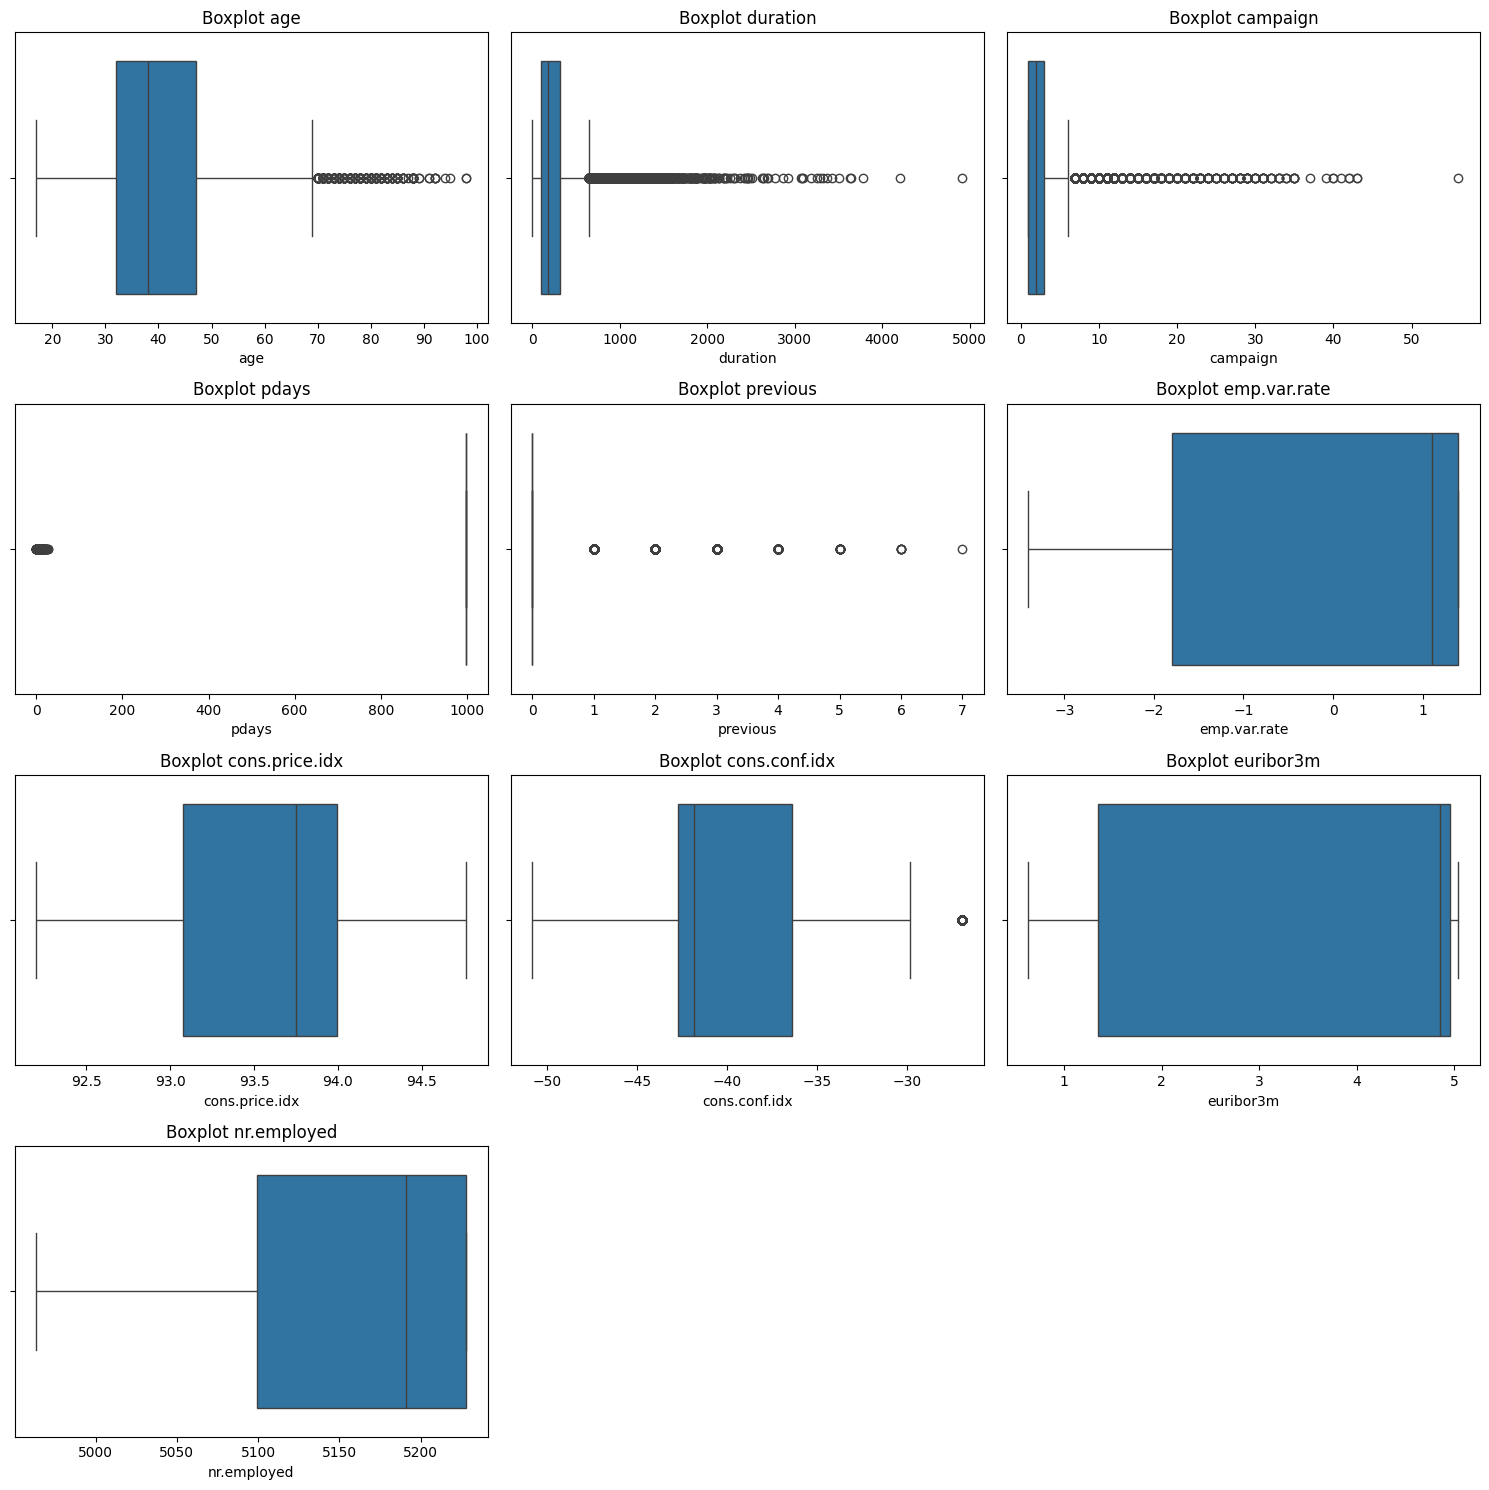

In [15]:
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()
plt.show()

Dapat dilihat dari scatter plot diatas pada fitur **age**, **duration**, **campaign**, **pdays**, **previous**, dan **cons.conf.idx** terdapat outliers

In [16]:
# Pilih kolom numerik
numeric_columns = df.select_dtypes(include='number')
list_outliers_count = []

for column in numeric_columns.columns:
    q3 = numeric_columns.describe().loc['75%', column]
    q1 = numeric_columns.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Perhitungan outliers
    outliers_count = len(df[(df[column] > upper_bound) | (df[column] < lower_bound)])
    list_outliers_count.append(outliers_count)

outliers_df = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Outliers Count': list_outliers_count
})

# Sort by 'Outliers Count' in descending order
outliers_df_sorted = outliers_df.sort_values(by='Outliers Count', ascending=False)
outliers_df_sorted

,Column,Outliers Count
4,previous,5625
1,duration,2963
2,campaign,2406
3,pdays,1515
0,age,469
7,cons.conf.idx,447
5,emp.var.rate,0
6,cons.price.idx,0
8,euribor3m,0
9,nr.employed,0


#### Cek Outliers `campaign`

`campaign` merupakan jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)

In [17]:
df[df['campaign'] >= 7]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1043,41,technician,single,university.degree,unknown,no,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1097,51,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic.9y,no,no,no,telephone,sep,fri,...,9,999,1,failure,-1.1,94.199,-37.5,0.883,4963.6,no
40631,88,retired,married,basic.4y,no,yes,no,cellular,sep,mon,...,7,999,0,nonexistent,-1.1,94.199,-37.5,0.882,4963.6,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,...,7,3,5,success,-1.1,94.199,-37.5,0.879,4963.6,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,...,9,999,2,failure,-1.1,94.199,-37.5,0.879,4963.6,no


Outliers pada campaign tidak memberikan banyak pengaruh, maka dipertahankan dahulu

#### Cek Outliers `pdays`

`pdays` merupakan jumlah hari yang telah berlalu sejak klien terakhir dihubungi dari kampanye sebelumnya. Terdapat data angka 999 berarti klien belum pernah dihubungi sebelumnya

In [18]:
df[df['pdays'] != 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [19]:
len(df[df['pdays'] != 999]) / len(df) * 100

3.6782558026609693

Outliers pada pdays tidak memberikan banyak pengaruh, maka dipertahankan dahulu

#### Cek Outliers `previous`

Terdapat data previous adalah > 0 dan pdays == 999, diputuskan Menyelamatkan data ini dengan menggantinya dengan pertimbangan data pdays selain 999 (pernah dihubungi) dan poutcome.

In [20]:
df[df['previous'] != 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


## Visualisasi Distribusi untuk Semua Fitur Numerik

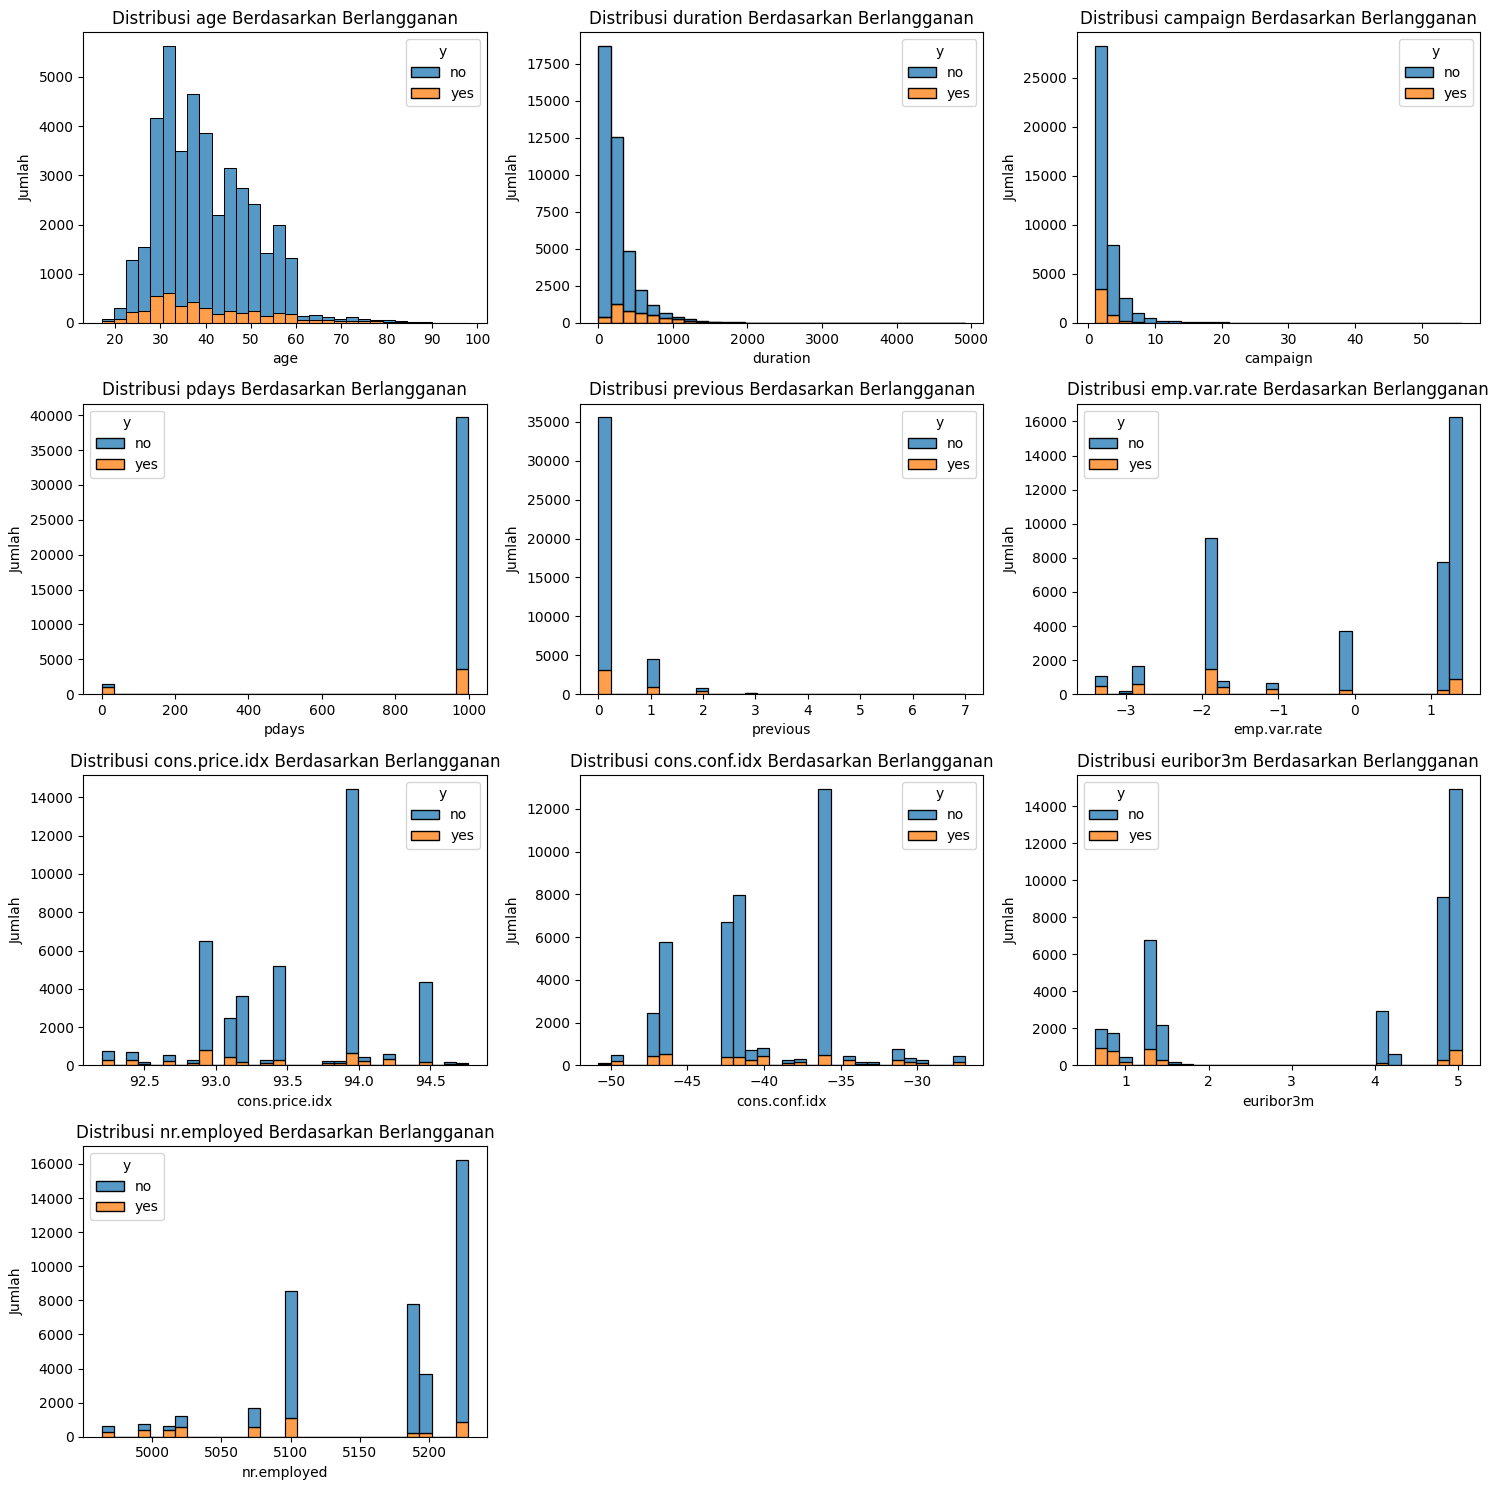

In [21]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, hue='y', multiple='stack', bins=30)
    plt.title(f'Distribusi {col} Berdasarkan Berlangganan')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
plt.show()

## Correlation Metrics

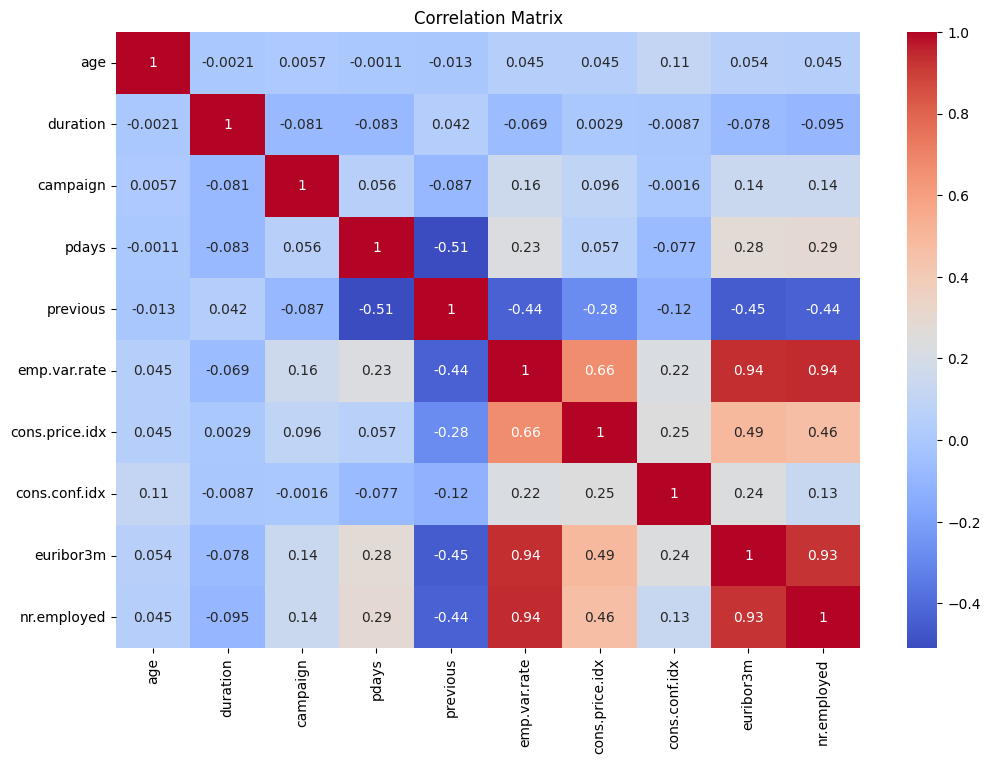

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric.corr(method='spearman'), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Korelasi yang sangat tinggi (>0.7) terdapat pada :

- `nr.employed` dengan `euribor3m`
- `nr.employed` dengan `emp.var.rate`
- `emp.var.rate` dengan `euribor3m`

Korelasi tinggi (0.5 - 0.7) terdapat pada :

- `cons.price.idx` dengan `emp.var.rate`

## Multikolinearitas

Variance Inflation Factor (VIF) adalah metode umum yang digunakan untuk mendeteksi adanya multikolinearitas antara variabel independen dalam sebuah model regresi. VIF mengukur seberapa besar varians dari estimasi koefisien sebuah variabel meningkat karena adanya korelasi linear dengan variabel lain.

Secara umum, nilai VIF lebih besar dari 10 dianggap menunjukkan adanya multikolinearitas yang serius. Tetapi, ada beberapa sumber yang menggunakan ambang batas 5 sebagai indikator awal multikolinearitas.

In [23]:
# Memilih hanya kolom numerik
num_cols = df.select_dtypes(include=['number'])

# Menghitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols.columns
vif_data["VIF"] = [variance_inflation_factor(num_cols.values, i) for i in range(len(num_cols.columns))]
vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
9,nr.employed,26746.634212
6,cons.price.idx,22561.123124
8,euribor3m,226.237349
7,cons.conf.idx,120.086975
3,pdays,44.413175
5,emp.var.rate,28.910219
0,age,16.047296
1,duration,2.011044
4,previous,2.001464
2,campaign,1.921499


Fitur dengan multikolinearitas rendah :

- `campaign`
- `duration`
- `previous`

Mayoritas variabel yang berkaitan dengan sosial ekonomi memiliki multikolinearitas yang tinggi :

- `nr.employed`
- `cons.price.idx`
- `euribor3m`
- `cons.conf.idx`
- `pdays`
- `emp.var.rate`
- `age`

## Categorical Variables

In [24]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [25]:
categoric = df.select_dtypes(include = 'object')
categoric.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

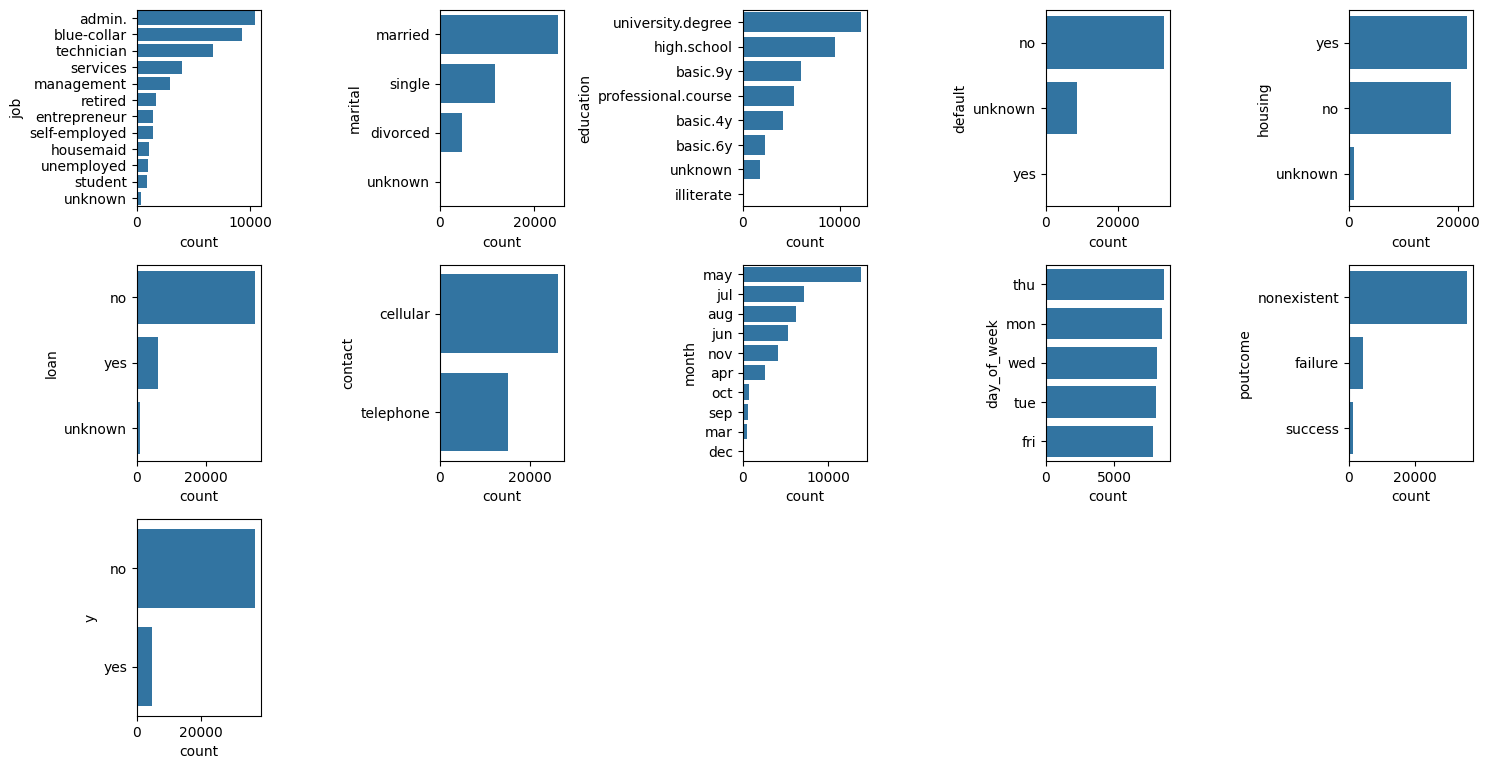

In [26]:
# Change the figure size (container for the plots)
plt.figure(figsize=(15, 15))  # (width, height)

position = 1  # Initialize position starting from 1
for each_column in categoric.columns:  # categorical.columns = list of column names
    plt.subplot(6, 5, position)
    sns.barplot(df[each_column].value_counts().head(15), orient='h')
    position = position + 1
    # Prevent overlapping
    plt.tight_layout()

### Visualisasi Fitur Kunci untuk Semua Fitur Kategorikal

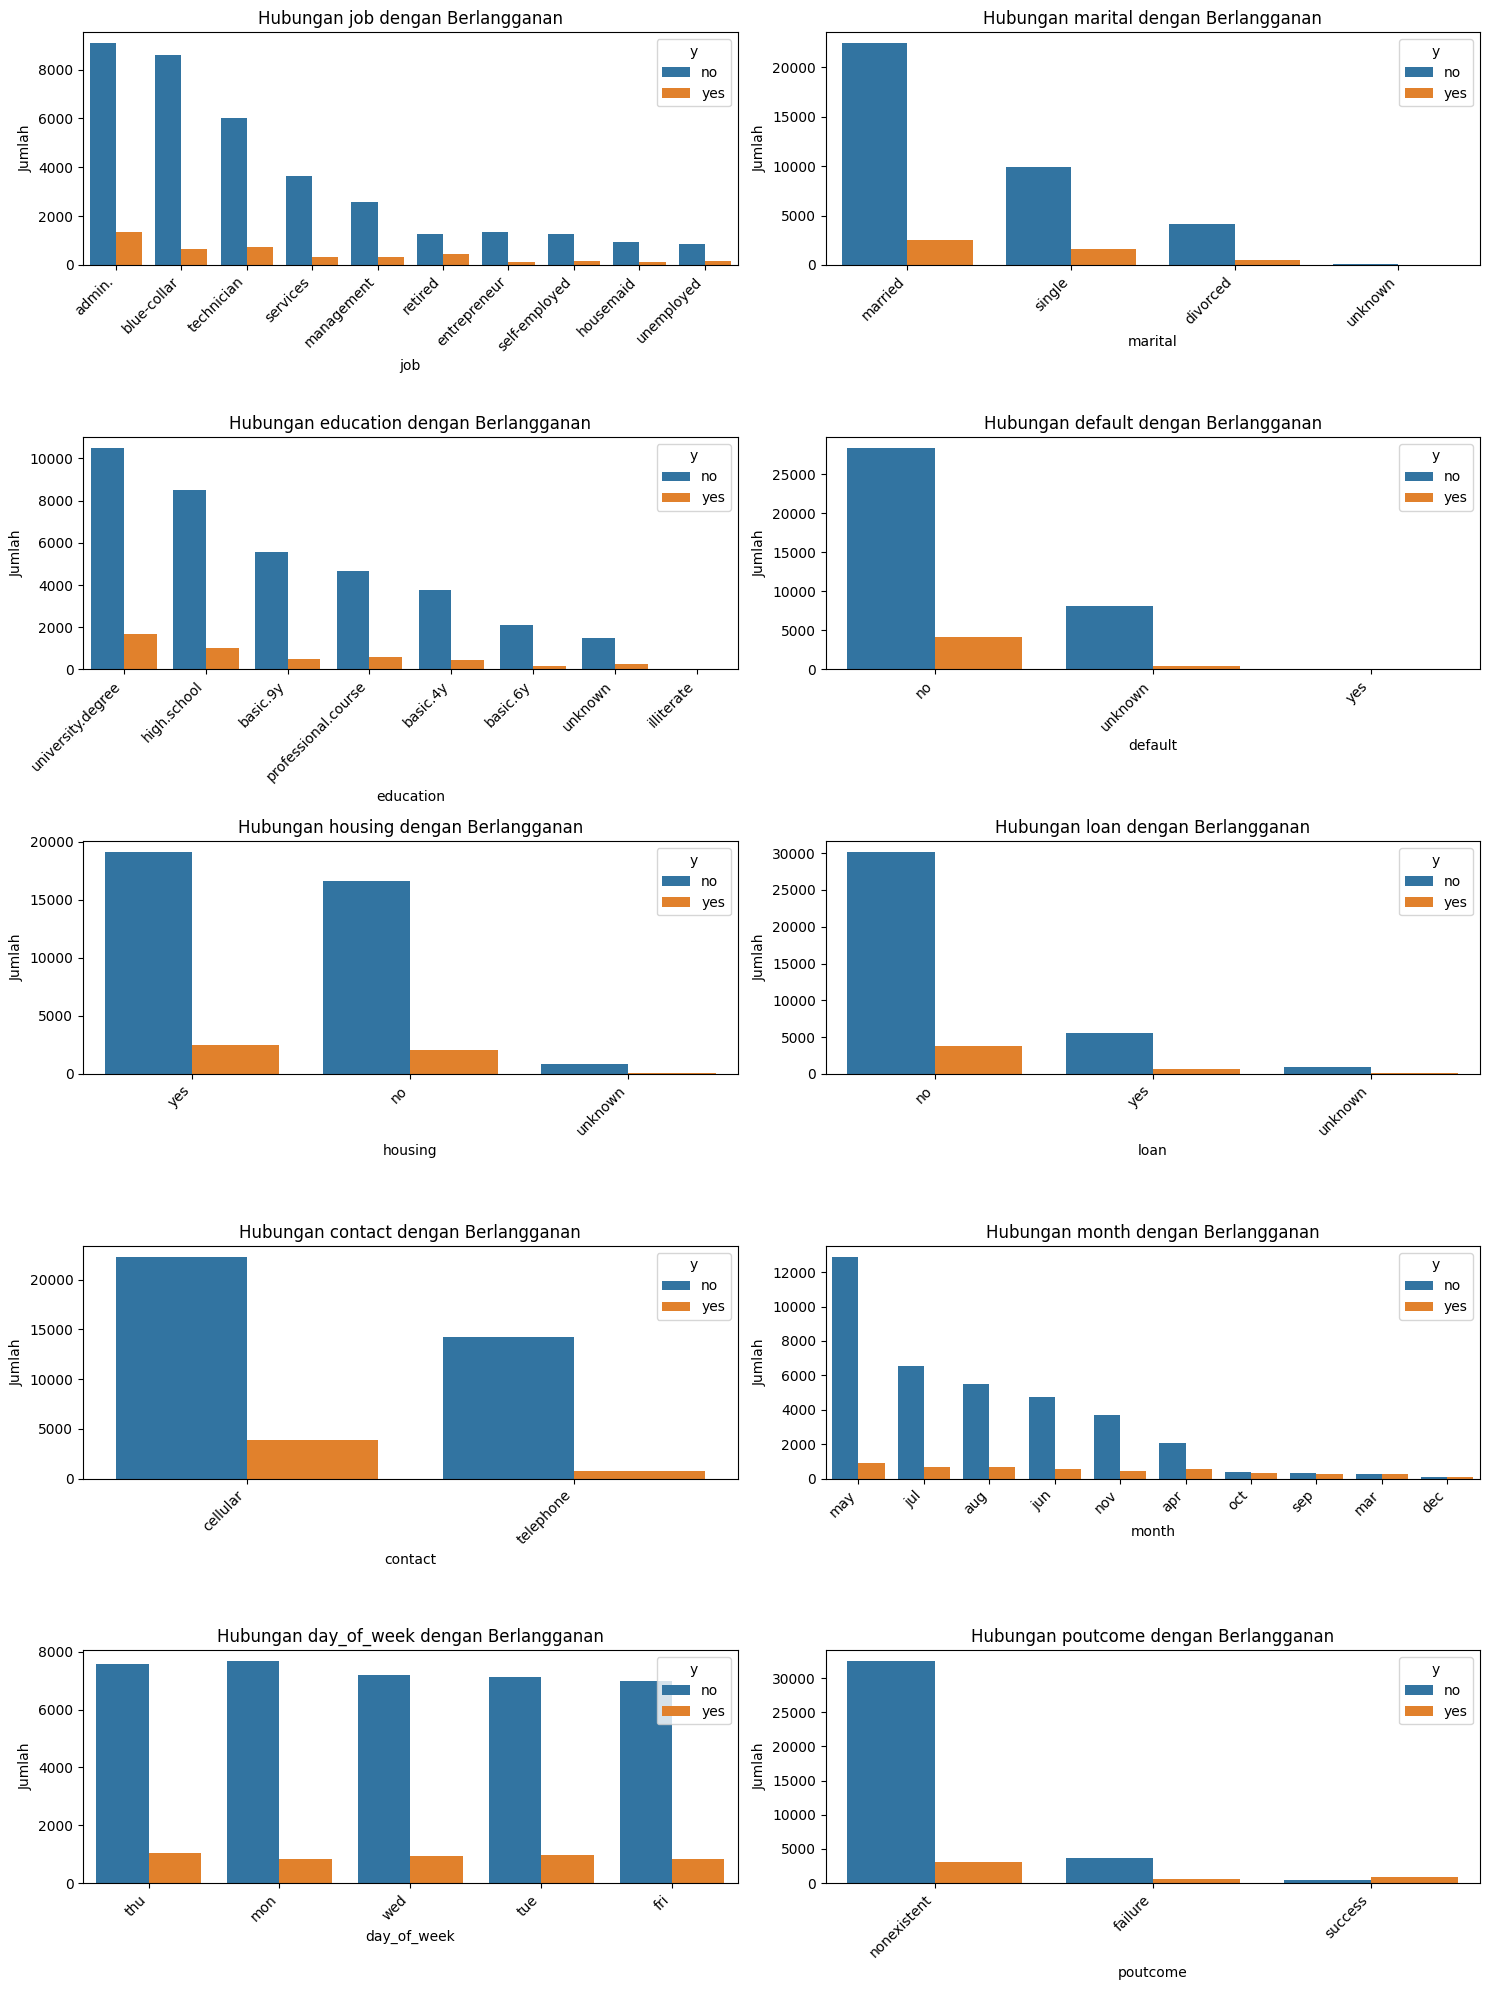

In [27]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index[:10])
    plt.title(f'Hubungan {col} dengan Berlangganan')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
plt.show()

## Kesimpulan

### Struktur Dataset
- **Sumber**: [Kaggle](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset).
- **Ukuran**: 41.188 baris, 21 kolom.
- **Fitur**:
  - **Demografi**:
    - `age`: Usia nasabah (numerik, rentang: 17–98 tahun), relevan untuk segmentasi nasabah.
    - `job`: Pekerjaan (kategorikal, 12 kategori: admin, blue-collar, technician, dll.), mendukung penargetan segmen spesifik.
    - `marital`: Status pernikahan (kategorikal: married, single, divorced, unknown), untuk profil nasabah.
    - `education`: Tingkat pendidikan (kategorikal: basic.4y, high.school, university.degree, dll., termasuk unknown), untuk segmentasi.
    - `default`: Status kredit macet (kategorikal: yes, no, unknown), indikator risiko keuangan.
    - `housing`: Pinjaman perumahan (kategorikal: yes, no, unknown), untuk profil finansial.
    - `loan`: Pinjaman pribadi (kategorikal: yes, no, unknown), untuk profil finansial.
  - **Kontak Kampanye**:
    - `contact`: Jenis kontak (kategorikal: cellular, telephone), relevan untuk optimasi metode kontak.
    - `month`: Bulan kontak terakhir (kategorikal: jan, feb, ..., dec), untuk optimasi waktu kampanye.
    - `day_of_week`: Hari kontak (kategorikal: mon, tue, ..., fri), untuk optimasi waktu.
    - `duration`: Durasi panggilan dalam detik (numerik, rentang: 0–4918 detik), dihapus karena data leakage.
    - `campaign`: Jumlah kontak selama kampanye ini (numerik, rentang: 1–56), untuk efisiensi kontak.
  - **Riwayat Kampanye**:
    - `pdays`: Hari sejak kontak terakhir dari kampanye sebelumnya (numerik, 999 berarti belum dikontak), untuk riwayat interaksi.
    - `previous`: Jumlah kontak sebelum kampanye ini (numerik, rentang: 0–7), untuk riwayat interaksi.
    - `poutcome`: Hasil kampanye sebelumnya (kategorikal: success, failure, nonexistent), kunci untuk prediksi konversi.
  - **Makroekonomi**:
    - `emp.var.rate`: Tingkat variasi pekerjaan (numerik, rentang: -3.4 hingga 1.4), untuk konteks ekonomi.
    - `cons.price.idx`: Indeks harga konsumen (numerik, rentang: 92.893–94.767), untuk konteks ekonomi.
    - `cons.conf.idx`: Indeks kepercayaan konsumen (numerik, rentang: -50.8 hingga -26.9), untuk konteks ekonomi.
    - `euribor3m`: Suku bunga Euribor 3 bulan (numerik, rentang: 0.634–5.045), untuk konteks ekonomi.
    - `nr.employed`: Jumlah karyawan (numerik, rentang: 4963.6–5228.1), untuk konteks ekonomi.
  - **Target**:
    - `y`: Langganan deposito (kategorikal: yes, no), untuk prediksi konversi.
- **Tipe Data** (berdasarkan `df.info()`):
  - Numerik (`int64`/`float64`): `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`.
  - Kategorikal (`object`): `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, `y`.

### Relevansi
- **Konversi Rendah (11%)**: Fitur seperti `poutcome` (success berkorelasi dengan `y=yes`) dan demografi (`job`, `age`) mendukung identifikasi nasabah potensial untuk meningkatkan konversi ke 20% dan meminimalkan False Negatives (€45 per nasabah terlewat).
- **Efisiensi Kampanye**: Fitur `contact` (cellular vs. telephone) dan `month` mendukung optimasi metode dan waktu kontak untuk mengurangi biaya kampanye 30%.
- **Segmentasi Nasabah**: Fitur demografi (`job`, `age`) memungkinkan penargetan 50% nasabah berprobabilitas tinggi.
- **Validasi Eksternal**: Fitur makroekonomi (`euribor3m`, `emp.var.rate`) mendukung riset tren pasca-krisis 2008 untuk mengontekstualisasikan temuan.

### Isu Data
- **Ketidakseimbangan Kelas**: Berdasarkan `df['y'].value_counts(normalize=True)`, ~11.3% `y=yes` dan ~88.7% `y=no`, memerlukan SMOTE untuk oversampling dan metrik Recall serta F2-Score untuk fokus pada nasabah potensial, mendukung tujuan Recall ≥85%.
- **Data Leakage**: Fitur `duration` harus dihapus karena hanya tersedia pasca-kampanye, relevan dengan prediksi real-time.
- **Missing Values**: Tidak ada nilai null (`df.isnull().sum()`), tetapi nilai "unknown" ada di:
  - `poutcome`: ~86% (nonexistent menunjukkan tidak ada riwayat kampanye).
  - `default`: ~21% (ketidakpastian status kredit).
  - `education`: ~4%, `job`: ~0.8%, `housing`: ~2.4%, `loan`: ~2.4%.
  - **Strategi**: Imputasi modus untuk `education` dan `job` (proporsi kecil), penghapusan baris untuk `default` jika <5%, atau imputasi berbasis model untuk `poutcome`.
- **Duplikasi**: 12 baris duplikat (`df.duplicated().sum()`), akan dihapus di preprocessing.
- **Outlier**: Berdasarkan boxplot:
  - `age`: Nilai >70 tahun.
  - `campaign`: Kontak >20 kali.
  - `pdays`: Nilai selain 999.
  - `previous`: Kontak >5 kali.
  - `cons.conf.idx`: Nilai ekstrem di luar rentang normal.
  - **Strategi**: Capping menggunakan IQR untuk `age` dan `campaign`, transformasi log untuk fitur skew seperti `previous`.
- **Konteks Historis**: Data 2008–2010 mungkin kurang relevan untuk pasar saat ini, mendukung kebutuhan riset eksternal (ECB, OECD).
- **Multikolinearitas**: Korelasi tinggi (>90%) antara `emp.var.rate`, `euribor3m`, dan `nr.employed` (berdasarkan heatmap), memerlukan PCA atau feature selection di preprocessing.

### Distribusi Fitur dan Wawasan Bisnis
- **Numerik** (berdasarkan histogram):
  - `age`: Hampir normal, mayoritas 30–50 tahun, relevan untuk segmentasi nasabah prioritas.
  - `duration`: Skew ke kanan, akan dihapus karena data leakage.
  - `campaign`, `pdays`, `previous`: Sangat skew, mayoritas nilai kecil (`pdays=999` ~90%), menunjukkan sedikit riwayat kontak.
  - `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`: Variasi terkait kondisi ekonomi, perlu analisis EDA untuk hubungan dengan `y`.
- **Kategorikal** (berdasarkan countplot):
  - `job`: Dominan `admin` (~25%), `blue-collar` (~22%), `technician` (~18%), dengan `retired` dan `student` menunjukkan konversi lebih tinggi.
  - `poutcome`: ~86% `nonexistent`, tetapi `success` berkorelasi kuat dengan `y=yes`, kunci untuk konversi.
  - `contact`: `cellular` (~65%) lebih umum dan memiliki konversi lebih tinggi, mendukung efisiensi kampanye.
  - `month`: Mei (~34%) dominan, tetapi Maret, Oktober, dan Desember memiliki konversi lebih tinggi, relevan untuk optimasi waktu.
- **Wawasan Bisnis**:
  - **Metode Kontak**: `cellular` lebih efektif, dapat mengurangi biaya kampanye dengan memprioritaskan komunikasi seluler.
  - **Riwayat Kampanye**: `poutcome=success` meningkatkan peluang konversi, mendukung penargetan nasabah dari kampanye sebelumnya untuk mencapai konversi 20%.
  - **Waktu Kontak**: Bulan Maret, Oktober, dan Desember lebih efektif, mendukung penyesuaian waktu kampanye.
  - **Segmentasi**: Segmen `retired` dan `student` berpotensi diprioritaskan untuk penargetan 50% nasabah berprobabilitas tinggi.
  - **Kondisi Ekonomi**: Fitur makroekonomi relevan untuk validasi eksternal tren pasca-2008.

  ### Integrasi dengan Definisi Masalah
- **Konversi Rendah (11%)**: Ketidakseimbangan kelas (~11.3% `y=yes`) menegaskan kebutuhan SMOTE dan metrik Recall untuk meminimalkan False Negatives (€45), mendukung tujuan Recall ≥85% dan F2-Score ≥80%.
- **Efisiensi Kampanye**: Fitur `contact=cellular` dan bulan Maret/Oktober mendukung optimasi metode dan waktu kontak untuk pengurangan biaya 30%.
- **Segmentasi Nasabah**: Fitur `job` dan `age` memungkinkan penargetan 50% nasabah berprobabilitas tinggi untuk konversi 20%.
- **Validasi Eksternal**: Fitur makroekonomi mendukung riset tren pasca-2008 (ECB, OECD) untuk mengontekstualisasikan temuan.

# **Data Cleaning**

## Load Dataset

In [29]:
df = pd.read_csv("./Data/bank-additional-full.csv", encoding='utf-8', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Initial Data Inspection

Sebelum data cleaning, kami akan mengecek setiap fitur

In [30]:
df_info = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_values': df.isna().sum().values,  # Jumlah nilai missing
    'missing_values(%)': df.isna().mean().values * 100,  # Persentase nilai missing
    'neg_value': [len(df[col][df[col] < 0]) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],  # Jumlah nilai negatif
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],  # Persentase nilai negatif
    '0_value': [len(df[col][df[col] == 0]) if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],  # Jumlah nilai nol
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],  # Persentase nilai nol
    'duplicate': [df.duplicated().sum() if i == 0 else '' for i in range(len(df.columns))],  # Duplikasi seluruh DataFrame
    'n_unique': df.nunique().values,  # Jumlah nilai unik
    'sample_unique': [df[col].unique()[:5] for col in df.columns]  # Sampel nilai unik (max 5 nilai)
}).round(3)

df_info

,feature,data_type,missing_values,missing_values(%),neg_value,neg_value(%),0_value,0_value(%),duplicate,n_unique,sample_unique
0,age,int64,0,0.0,0,0.000,0,0.000,12,78,"[56, 57, 37, 40, 45]"
1,job,object,0,0.0,0,0.000,0,0.000,,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,object,0,0.0,0,0.000,0,0.000,,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,0,0.000,0,0.000,,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,object,0,0.0,0,0.000,0,0.000,,3,"[no, unknown, yes]"
5,housing,object,0,0.0,0,0.000,0,0.000,,3,"[no, yes, unknown]"
6,loan,object,0,0.0,0,0.000,0,0.000,,3,"[no, yes, unknown]"
7,contact,object,0,0.0,0,0.000,0,0.000,,2,"[telephone, cellular]"
8,month,object,0,0.0,0,0.000,0,0.000,,10,"[may, jun, jul, aug, oct]"
9,day_of_week,object,0,0.0,0,0.000,0,0.000,,5,"[mon, tue, wed, thu, fri]"


## Handling Duplicated Data

In [31]:
# Drop duplicates data
df = df.drop_duplicates()
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

# Validasi distribusi target setelah penghapusan duplikat
print("\nDistribusi target variable y setelah drop duplicates:\n", 
      df['y'].value_counts(normalize=True).round(3))

Jumlah baris dataset: 41176
Jumlah kolom dataset: 21

Distribusi target variable y setelah drop duplicates:
 y
no     0.887
yes    0.113
Name: proportion, dtype: float64


## Handling "unknown" Values

### Cek Pesebaran Unknown

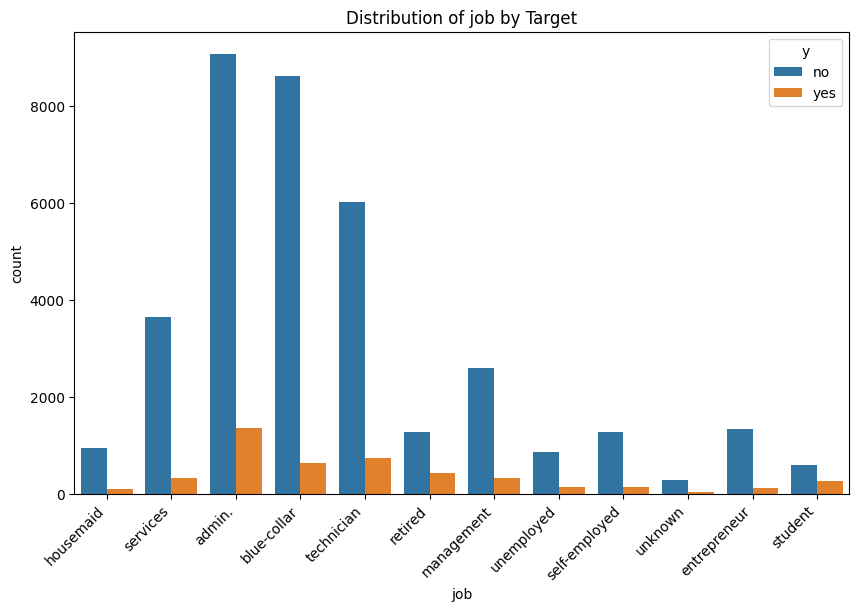

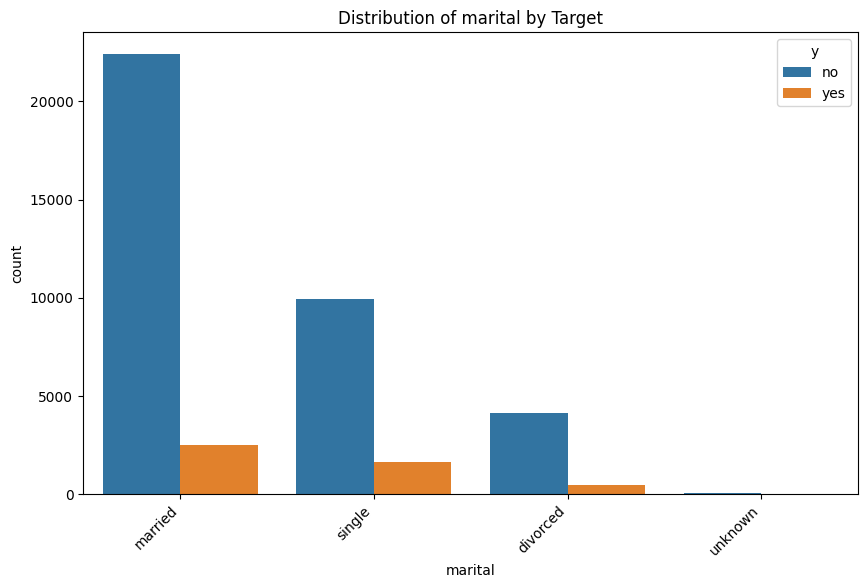

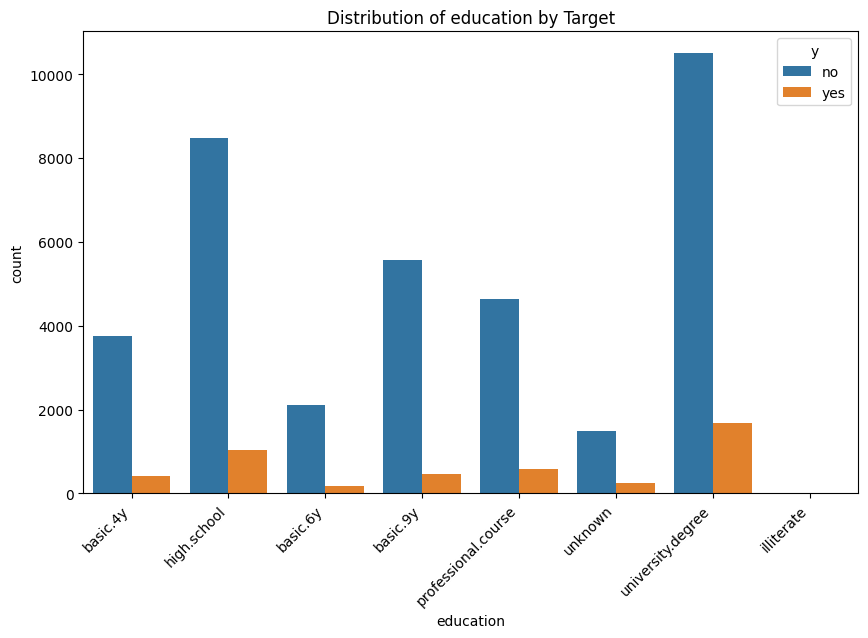

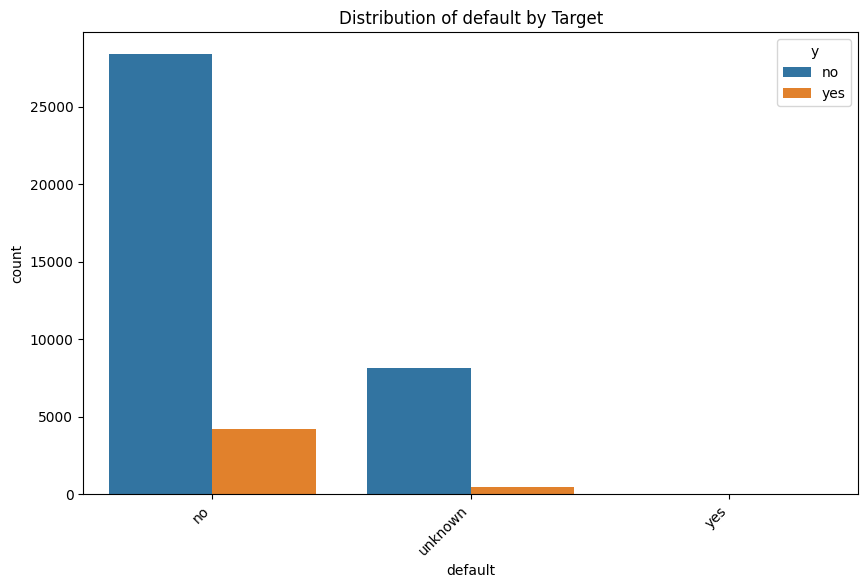

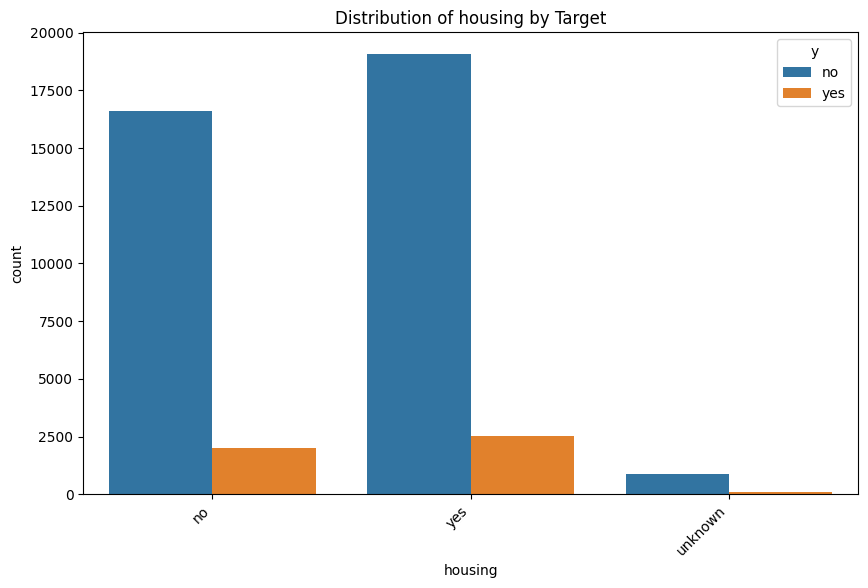

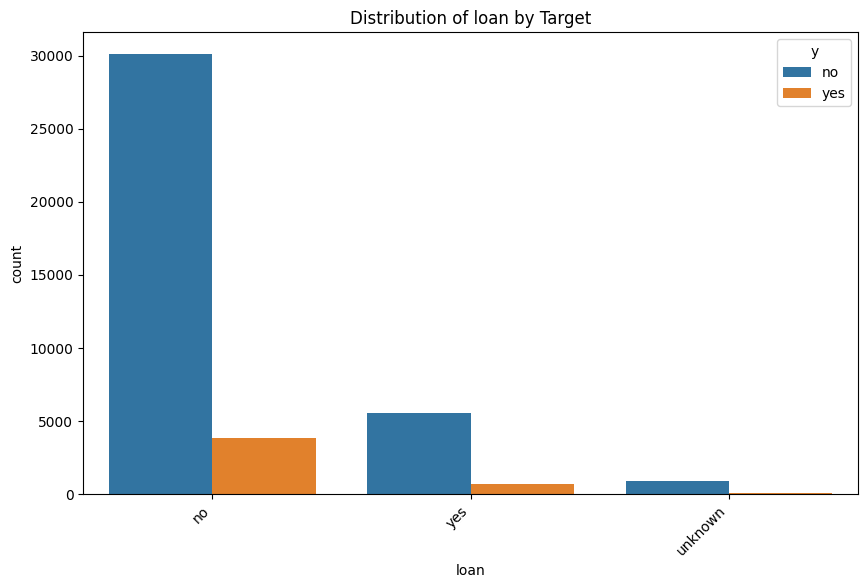

In [ ]:
# visualisasi setiap fitur untuk melihat sebaran data unknown

categoric_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in categoric_with_unknown:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [33]:
# Calculate the percentage of 'unknown' data for each specified column
for col in categoric_with_unknown:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    total_count = df.shape[0]
    percentage = (unknown_count / total_count) * 100
    print(f"Percentage of 'unknown' in '{col}': {percentage:.2f}%")

Percentage of 'unknown' in 'job': 0.80%
Percentage of 'unknown' in 'marital': 0.19%
Percentage of 'unknown' in 'education': 4.20%
Percentage of 'unknown' in 'default': 20.88%
Percentage of 'unknown' in 'housing': 2.40%
Percentage of 'unknown' in 'loan': 2.40%


Dari hasil pesebaran setiap kolom hampir semuanya berada di bawah atau kurang dari 5%, kecuali kolom `default` memiliki proporsi data unknown sebesar 20.88%.

Kemungkinan besar data unknown akan diisi dengan Modus, dan fitur `Default` akan dicek terlebih dahulu untuk melakukan handling.

Lalu untuk handlingnya,
- fitur `job` akan diisi berdasarkan modus,
- fitur `education` juga akan diisi berdasarkan modus,
- untuk fitur `marital` akan diisi berdasarkan modus juga,
- dan untuk fitur `housing` dan `loan` akan diisi berdasarkan modus fitur `marital`. Tetapi akan melalui uji statistik terlebih dahulu untuk memastikan hubunganya.

### Handling Per Fitur

#### Fitur `Job`

In [34]:
# Handling fitur job dengan modus
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['job'].value_counts()

job
admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

#### Fitur `Education`

In [35]:
# Handling fitur education dengan modus
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['education'].value_counts()

education
university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: count, dtype: int64

#### Fitur `Marital`

In [36]:
# Handling fitur marital dengan modus
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])
df['marital'].value_counts()

marital
married     25001
single      11564
divorced     4611
Name: count, dtype: int64

#### Fitur `Housing` & `Loan`

Kami akan melalui uji statistik terlebih dahulu untuk memastikan hubunganya.

In [ ]:
#  Uji statistik fitur housing dan loan terhadap marital

# Housing and Loan vs Marital Status
# Perform chi-squared test for independence
chi2_housing_marital, p_housing_marital, dof_housing_marital, expected_housing_marital = chi2_contingency(pd.crosstab(df['housing'], df['marital']))
chi2_loan_marital, p_loan_marital, dof_loan_marital, expected_loan_marital = chi2_contingency(pd.crosstab(df['loan'], df['marital']))

print(f"Chi-squared test results for Housing vs Marital:")
print(f"Chi-squared statistic: {chi2_housing_marital:.4f}")
print(f"P-value: {p_housing_marital:.4f}")

print(f"\nChi-squared test results for Loan vs Marital:")
print(f"Chi-squared statistic: {chi2_loan_marital:.4f}")
print(f"P-value: {p_loan_marital:.4f}")

# Interpretation (assuming alpha = 0.05)
alpha = 0.05
if p_housing_marital < alpha:
    print("\nThere is a statistically significant relationship between Housing and Marital status.")
else:
    print("\nThere is no statistically significant relationship between Housing and Marital status.")

if p_loan_marital < alpha:
    print("There is a statistically significant relationship between Loan and Marital status.")
else:
    print("There is no statistically significant relationship between Loan and Marital status.")

Chi-squared test results for Housing vs Marital:
Chi-squared statistic: 9.9206
P-value: 0.0418

Chi-squared test results for Loan vs Marital:
Chi-squared statistic: 2.9122
P-value: 0.5726

There is a statistically significant relationship between Housing and Marital status.
There is no statistically significant relationship between Loan and Marital status.


Hasilnya, hanya `housing` yang memiliki hubungan signifikan/dipengaruhi oleh `marital` (status pernikahan).

Maka dari itu fitur `housing` akan diisi dengan modus berdasarkan `marital`, dan `loan` akan diisi dengan modus tanpa didasari fitur lain.

In [38]:
# Menghitung status housing yang paling sering muncul (mode) berdasarkan marital
housing_by_marital = df.groupby('marital')['housing'].agg(lambda x: x.mode()[0])
housing_by_marital

marital
divorced    yes
married     yes
single      yes
Name: housing, dtype: object

Setelah diketahui modus dari `housing` berdasarkan `marital`, maka kita bisa mengganti `housing` yang berisi unknown dengan modus `housing` berdasarkan `marital`.

##### Fitur `Housing`

In [39]:
df.loc[df['housing'] == 'unknown', 'housing'] = df.loc[df['housing'] == 'unknown', 'marital'].map(housing_by_marital)
df['housing'].value_counts()

housing
yes    22561
no     18615
Name: count, dtype: int64

##### Fitur `Loan`

In [40]:
# Handling fitur loan dengan modus
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])
df['loan'].value_counts()

loan
no     34928
yes     6248
Name: count, dtype: int64

#### Fitur `Default`

Fitur default merupakan status apakah klien punya kredit macet sebelumnya (yes/no). Fitur ini bisa menjadi indikasi risiko. Maka dari itu sebelum menghandling fitur ini harus di cek terlebih dahulu.

In [41]:
df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

Ada beberapa pertimbangan untuk mengandling fitur `default`, dimana fitur ini memiliki tiga nilai: 'no', 'unknown', dan 'yes'. Nilai 'no' merupakan yang paling dominan, sementara 'unknown' tidak memberikan informasi yang jelas apakah seorang pelanggan pernah gagal bayar atau tidak.

Keputusannya fitur ini akan dihapus karena menghandling 20.88% dari data tersebut sangat mempengaruhi prediksi target, dan kurangnya variasi data juga tidak memberikan kontribusi yang signifikan. Lalu dari domain knowledge nya, sistem pembayaran pada layanan deposito dilakukan di awal, sehingga informasi mengenai riwayat gagal bayar pelanggan menjadi kurang relevan.

In [42]:
# menghapus kolom default
df.drop('default', axis=1, inplace=True)

## Removing Data Leakage
Menghapus kolom `duration`, karena *data leakage* (hanya diketahui setelah panggilan). Menghapus `duration` memastikan model hanya menggunakan fitur yang tersedia sebelum kontak, sesuai dengan skenario prediksi *real-time*.

In [43]:
# Hapus kolom duration
df = df.drop('duration', axis=1)
print("Kolom setelah penghapusan:", df.columns)

# Validasi distribusi target setelah penghapusan
print("\nDistribusi target variable y setelah menghapus duration:\n", 
      df['y'].value_counts(normalize=True).round(3))

Kolom setelah penghapusan: Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

Distribusi target variable y setelah menghapus duration:
 y
no     0.887
yes    0.113
Name: proportion, dtype: float64


Penambahan validasi distribusi `y` memastikan bahwa penghapusan `duration` tidak mengubah proporsi kelas (`yes` ~11.3%), yang penting untuk menjaga representasi kelas minoritas guna mencapai Recall ≥85%.

Langkah ini mendukung tujuan proyek dengan memastikan model hanya menggunakan fitur prediktif yang tersedia sebelum kampanye, meningkatkan relevansi untuk segmentasi klien.

## Handling Outliers
Menggunakan metode *capping* berdasarkan IQR untuk `age`, `campaign`, dan `cons.conf.idx`. *Capping* mempertahankan data outlier tanpa menghapusnya.

In [44]:
# Fungsi untuk capping outlier berdasarkan IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan capping pada age, campaign, cons.conf.idx
for col in ['age', 'campaign', 'cons.conf.idx']:
    df = cap_outliers(df, col)

# Validasi distribusi setelah capping
for col in ['age', 'campaign', 'cons.conf.idx']:
    print(f"Statistik {col} setelah capping:\n", df[col].describe())

# Transformasi previous menjadi kategorikal
df['previous'] = df['previous'].apply(lambda x: 'contacted' if x > 0 else 'not_contacted')
print("Distribusi previous:\n", df['previous'].value_counts())

df['age'] = df['age'].astype(int)

# Validasi hubungan previous dengan target y
print("\nProporsi konversi berdasarkan previous:\n", 
      pd.crosstab(df['previous'], df['y'], normalize='index').round(3))

Statistik age setelah capping:
 count    41176.000000
mean        39.939236
std         10.128801
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         69.500000
Name: age, dtype: float64
Statistik campaign setelah capping:
 count    41176.000000
mean         2.275476
std          1.550606
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign, dtype: float64
Statistik cons.conf.idx setelah capping:
 count    41176.000000
mean       -40.503405
std          4.626271
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.950000
Name: cons.conf.idx, dtype: float64
Distribusi previous:
 previous
not_contacted    35551
contacted         5625
Name: count, dtype: int64

Proporsi konversi berdasarkan previous:
 y                 no    yes
previous                   
contacted      0.734  0.266
not_contacted  0.912  0.088


## Final Validation and Saving

Periksa kembali dataset untuk memastikan tidak ada nilai "unknown", outlier ekstrem, atau inkonsistensi tipe data. Simpan dataset yang telah diproses sepenuhnya. Validasi memastikan dataset siap untuk EDA dan pemodelan tanpa masalah tersembunyi.


In [45]:
# Cek nilai "unknown" di kolom kategorikal awal
print("Pemeriksaan nilai 'unknown':")
for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays', 'previous']:
    if col in df.columns and df[col].dtype == 'object':
        print(f"Jumlah 'unknown' di {col}:", (df[col] == 'unknown').sum())
    else:
        print(f"Kolom {col} sudah diencode.")

# Cek tipe data semua kolom
print("\nTipe data semua kolom:\n", df.dtypes)

# Cek nilai hilang
print("\nJumlah nilai hilang:\n", df.isna().sum())

# Simpan dataset
df.to_csv('./Data/data-clean.csv', index=False)
print("\nDataset tersimpan sebagai 'data-clean.csv'")

Pemeriksaan nilai 'unknown':
Jumlah 'unknown' di job: 0
Jumlah 'unknown' di marital: 0
Jumlah 'unknown' di education: 0
Jumlah 'unknown' di housing: 0
Jumlah 'unknown' di loan: 0
Jumlah 'unknown' di contact: 0
Jumlah 'unknown' di month: 0
Jumlah 'unknown' di day_of_week: 0
Jumlah 'unknown' di poutcome: 0
Kolom pdays sudah diencode.
Jumlah 'unknown' di previous: 0

Tipe data semua kolom:
 age                 int64
job                object
marital            object
education          object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous           object
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Jumlah nilai hilang:
 age               0
job               0
marital           0
education         

# **Preprocessing**

## Feature Engineering

1. **Age Grouping**

    Data understanding menunjukkan usia 51+ memiliki probabilitas berlangganan lebih tinggi (~0.3-0.5). Pengelompokan ke `Young (<=30)`, `Middle (31-50)`, `Senior (51+)` menyederhanakan pola demografis.

2. **Financial Stability**

    Klien yang menikah tanpa pinjaman (`housing=no`, `loan=no`) memiliki probabilitas berlangganan ~0.5, sedangkan klien bercerai dengan pinjaman ~0.1. Fitur ini menggabungkan `marital`, `housing`, dan `loan`.

3. **Previous Campaign Success**

    `poutcome=success` memiliki probabilitas berlangganan ~0.6. Fitur biner ini menyoroti riwayat kampanye yang sukses.

4. **Campaign Frequency (with validation for no zero values)**

    Frekuensi kontak 3-4 kali optimal (~0.12). Kategorisasi `Low (<=2)`, `Optimal (3-4)`, `High (>4)` menangkap efektivitas kampanye.

5. **Economic Condition (adjusted cons.conf.idx threshold to < -45)**

    Kondisi ekonomi tidak stabil (`emp.var.rate < 0`, `euribor3m < 2`, `cons.conf.idx < -45`) meningkatkan minat deposito (~0.15). Ambang batas `-45` sesuai dengan rentang data (-50.8 hingga -36.4).

6. **Optimal Campaign Month**

    Bulan Maret dan April memiliki probabilitas berlangganan ~0.5. Fitur biner ini menyoroti waktu kampanye yang optimal.

7. **Economic Score (numerical combination of emp.var.rate, euribor3m, cons.conf.idx)**

    Menggabungkan `emp.var.rate`, `euribor3m`, dan `cons.conf.idx` menjadi skor numerik (rata-rata z-score) untuk menangkap variasi ekonomi secara halus.

8. **Has Previous Contact**

    Kolom `previous` ("contacted", "not_contacted") menunjukkan apakah klien pernah dikontak sebelumnya. Klien dengan `previous="contacted"` mungkin lebih responsif berdasarkan EDA.

9. **Pdays Grouping**

    `pdays` memiliki nilai 999 (tidak pernah dikontak) dan nilai numerik lainnya (misalnya, 3, 6). Pengelompokan ke `Never`, `Recent (<=7)`, `Long Ago (>7)` menangkap waktu sejak kontak terakhir, yang relevan untuk respons klien.

10. **High Subscription Job**

    Pekerjaan seperti `self-employed`, `retired`, dan `entrepreneur` memiliki probabilitas berlangganan lebih tinggi berdasarkan pemahaman data.

11. **Binning untuk `nr.employed`**

    Mengubah `nr.employed` menjadi kategorikal untuk menangkap pola non-linear dan mempermudah interpretasi, seperti yang dilakukan pada `age`, `campaign`, dan `pdays`.

In [46]:
df_fe = pd.read_csv('./Data/data-clean.csv')

pd.set_option('display.max_columns', None)
df_fe

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Fungsi untuk binning umur
def age_binning(age):
    """Mengubah umur menjadi kategori: Young, Middle, Senior."""
    try:
        if age <= 30:
            return 'Young (<=30)'
        elif 31 <= age <= 50:
            return 'Middle (31-50)'
        else:
            return 'Senior (51+)'
    except (TypeError, ValueError):
        return 'Unknown'

# Fungsi untuk stabilitas finansial
def financial_stability(row):
    """Menentukan stabilitas finansial berdasarkan marital, housing, dan loan."""
    try:
        if row['marital'] == 'married' and row['housing'] == 'no' and row['loan'] == 'no':
            return 'High'
        elif row['marital'] == 'divorced' and (row['housing'] == 'yes' or row['loan'] == 'yes'):
            return 'Low'
        else:
            return 'Medium'
    except:
        return 'Medium'

# Fungsi untuk frekuensi kampanye
def campaign_frequency(campaign):
    """Mengubah jumlah kontak kampanye menjadi kategori: Low, Optimal, High."""
    try:
        if campaign <= 2:
            return 'Low (<=2)'
        elif 3 <= campaign <= 4:
            return 'Optimal (3-4)'
        else:
            return 'High (>4)'
    except (TypeError, ValueError):
        return 'Low (<=2)'

# Fungsi untuk kondisi ekonomi
def economic_condition(row):
    """Menentukan kondisi ekonomi berdasarkan emp.var.rate, euribor3m, dan cons.conf.idx."""
    try:
        if row['emp.var.rate'] < 0 and row['euribor3m'] < 2 and row['cons.conf.idx'] < -45:
            return 'Unstable'
        else:
            return 'Stable'
    except:
        return 'Stable'

# Fungsi untuk binning pdays
def pdays_binning(pdays):
    """Mengubah pdays menjadi kategori: Never, Recent, Long Ago."""
    try:
        if pdays == 999:
            return 'Never'
        elif pdays <= 7:
            return 'Recent (<=7)'
        else:
            return 'Long Ago (>7)'
    except (TypeError, ValueError):
        return 'Never'

# Fungsi untuk binning nr.employed
def nr_employed_binning(nr_employed):
    """Mengubah nr.employed menjadi kategori: Good, Moderate, Poor."""
    try:
        if nr_employed <= 5000:
            return 'Good (<=5000)'
        elif 5001 <= nr_employed <= 5200:
            return 'Moderate (5001-5200)'
        else:
            return 'Poor (>5200)'
    except (TypeError, ValueError):
        return 'Moderate (5001-5200)'

# Feature Engineering
def apply_feature_engineering(df_fe):
    """Menerapkan semua transformasi feature engineering."""
    df_fe = df_fe.copy()  # Hindari modifikasi DataFrame asli

    # 1. Age binning
    df_fe['age_group'] = df_fe['age'].apply(age_binning)

    # 2. Financial stability
    df_fe['financial_stability'] = df_fe.apply(financial_stability, axis=1)

    # 3. Previous success
    df_fe['previous_success'] = df_fe['poutcome'].apply(lambda x: 1 if x == 'success' else 0)

    # 4. Campaign frequency
    df_fe['campaign_frequency'] = df_fe['campaign'].apply(campaign_frequency)

    # 5. Economic condition
    df_fe['economic_condition'] = df_fe.apply(economic_condition, axis=1)

    # 6. Optimal month
    df_fe['optimal_month'] = df_fe['month'].apply(lambda x: 1 if x in ['mar', 'apr'] else 0)

    # 7. Economic score
    scaler = StandardScaler()
    economic_cols = ['emp.var.rate', 'euribor3m', 'cons.conf.idx']
    df_fe['econ_score'] = scaler.fit_transform(df_fe[economic_cols]).mean(axis=1)

    # 8. Previous contact
    df_fe['has_previous_contact'] = df_fe['previous'].apply(lambda x: 1 if x == 'contacted' else 0)

    # 9. Pdays binning
    df_fe['pdays_group'] = df_fe['pdays'].apply(pdays_binning)

    # 10. High subscription job
    high_subscription_jobs = ['self-employed', 'retired', 'entrepreneur']
    df_fe['high_subscription_job'] = df_fe['job'].apply(lambda x: 1 if x in high_subscription_jobs else 0)

    # 11. Binning nr.employed
    df_fe['nr_employed_group'] = df_fe['nr.employed'].apply(nr_employed_binning)

    return df_fe

In [48]:
# Terapkan feature engineering
df_fe = apply_feature_engineering(df_fe)

# Verifikasi hasil
print("\nDistribusi fitur kategorikal baru:")
print("\nage_group:")
print(df_fe['age_group'].value_counts())
print("\nfinancial_stability:")
print(df_fe['financial_stability'].value_counts())
print("\ncampaign_frequency:")
print(df_fe['campaign_frequency'].value_counts())
print("\neconomic_condition:")
print(df_fe['economic_condition'].value_counts())
print("\npdays_group:")
print(df_fe['pdays_group'].value_counts())
print("\nnr_employed_group:")
print(df_fe['nr_employed_group'].value_counts())

# Tampilkan daftar kolom
print("\nKolom di df_fe setelah feature engineering:")
print(df_fe.columns.tolist())

# Tampilkan statistik nr.employed untuk verifikasi binning
print("\nStatistik nr.employed:")
print(df_fe['nr.employed'].describe())

# Simpan DataFrame hasil feature engineering
df_fe.to_csv('./Data/data-feature-engineering.csv', index=False)
print("\nDataFrame disimpan ke './Data/data-feature-engineering.csv")


Distribusi fitur kategorikal baru:

age_group:
age_group
Middle (31-50)    26617
Young (<=30)       7381
Senior (51+)       7178
Name: count, dtype: int64

financial_stability:
financial_stability
Medium    28504
High       9871
Low        2801
Name: count, dtype: int64

campaign_frequency:
campaign_frequency
Low (<=2)        28202
Optimal (3-4)     7990
High (>4)         4984
Name: count, dtype: int64

economic_condition:
economic_condition
Stable      32312
Unstable     8864
Name: count, dtype: int64

pdays_group:
pdays_group
Never            39661
Recent (<=7)      1177
Long Ago (>7)      338
Name: count, dtype: int64

nr_employed_group:
nr_employed_group
Moderate (5001-5200)    23540
Poor (>5200)            16228
Good (<=5000)            1408
Name: count, dtype: int64

Kolom di df_fe setelah feature engineering:
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',

In [49]:
df_features = pd.read_csv('./Data/data-feature-engineering.csv')
df_features

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,financial_stability,previous_success,campaign_frequency,economic_condition,optimal_month,econ_score,has_previous_contact,pdays_group,high_subscription_job,nr_employed_group
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle (31-50),Medium,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle (31-50),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),Medium,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Senior (51+),Medium,0,Low (<=2),Unstable,0,-1.491102,0,Never,1,Good (<=5000)
41172,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Middle (31-50),High,0,Low (<=2),Unstable,0,-1.491102,0,Never,0,Good (<=5000)
41173,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Senior (51+),Medium,0,Low (<=2),Unstable,0,-1.491102,0,Never,1,Good (<=5000)
41174,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Middle (31-50),High,0,Low (<=2),Unstable,0,-1.491102,0,Never,0,Good (<=5000)


# **Explanatory Data Analysis (EDA)**

Tujuan

- Mengidentifikasi pola dan hubungan antara fitur dan variabel target `y` untuk menemukan faktor kunci kesuksesan kampanye.
- Memberikan wawasan untuk optimasi strategi pemasaran, termasuk metode kampanye terbaik, waktu kontak optimal (bulan/hari), dan segmentasi klien prioritas (berdasarkan pekerjaan/pendidikan/status/usia).
- Menyediakan visualisasi dan analisis statistik untuk mendukung pengambilan keputusan berbasis data.

In [51]:
# load dataset
df = pd.read_csv('./Data/data-feature-engineering.csv')
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,financial_stability,previous_success,campaign_frequency,economic_condition,optimal_month,econ_score,has_previous_contact,pdays_group,high_subscription_job,nr_employed_group
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle (31-50),Medium,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle (31-50),High,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Senior (51+),Medium,0,Low (<=2),Stable,0,0.749185,0,Never,0,Moderate (5001-5200)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Senior (51+),Medium,0,Low (<=2),Unstable,0,-1.491102,0,Never,1,Good (<=5000)
41172,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Middle (31-50),High,0,Low (<=2),Unstable,0,-1.491102,0,Never,0,Good (<=5000)
41173,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,Senior (51+),Medium,0,Low (<=2),Unstable,0,-1.491102,0,Never,1,Good (<=5000)
41174,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,Middle (31-50),High,0,Low (<=2),Unstable,0,-1.491102,0,Never,0,Good (<=5000)


## Based on Perilaku Individual dan Kampanye

### Distribusi Kelas Berlangganan (y)

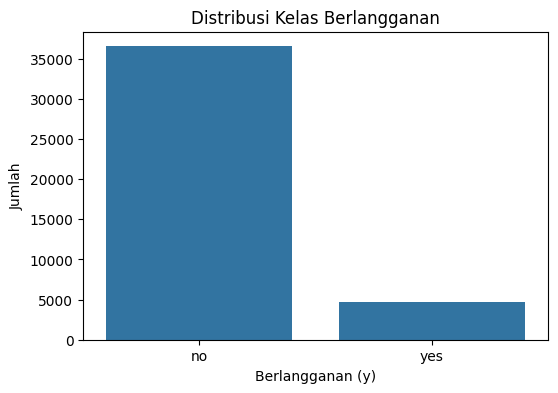

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Distribusi Kelas Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Jumlah')
plt.show()

**Interpretasi:**
Distribusi target menunjukkan **ketimpangan kelas yang signifikan**, di mana hanya sekitar **11%** dari nasabah yang berlangganan produk deposito berjangka (`y = yes`), sedangkan sisanya tidak (`y = no`).

**Aksi:**

* Terapkan metode penyeimbangan data seperti **SMOTE** atau **class weighting** untuk mengurangi bias model terhadap kelas mayoritas.
* Fokus pada **Recall** dalam evaluasi model, mengingat biaya kehilangan calon pelanggan potensial (False Negative) jauh lebih tinggi dibanding False Positive.

### Distribusi Usia dengan Boxplot Berdasarkan Berlangganan

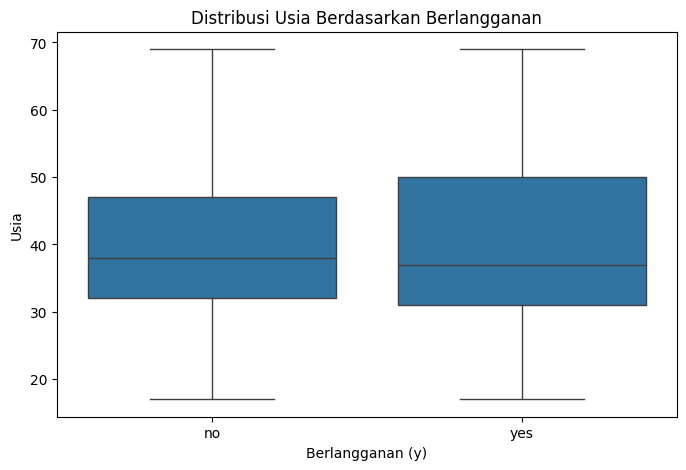

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='age')
plt.title('Distribusi Usia Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Usia')
plt.show()

**Interpretasi:**
Meskipun median usia relatif serupa antara kedua kelas, terdapat kecenderungan bahwa nasabah yang berlangganan memiliki sebaran usia yang lebih tinggi, terutama pada rentang **30–60 tahun**.

**Aksi:**

* Lakukan segmentasi usia, khususnya pada kelompok usia produktif (30–60 tahun), yang menunjukkan potensi lebih besar.
* Pertimbangkan untuk melakukan **feature binning** pada variabel usia agar dapat menangkap pola non-linear.

### Korelasi Pekerjaan dan Berlangganan

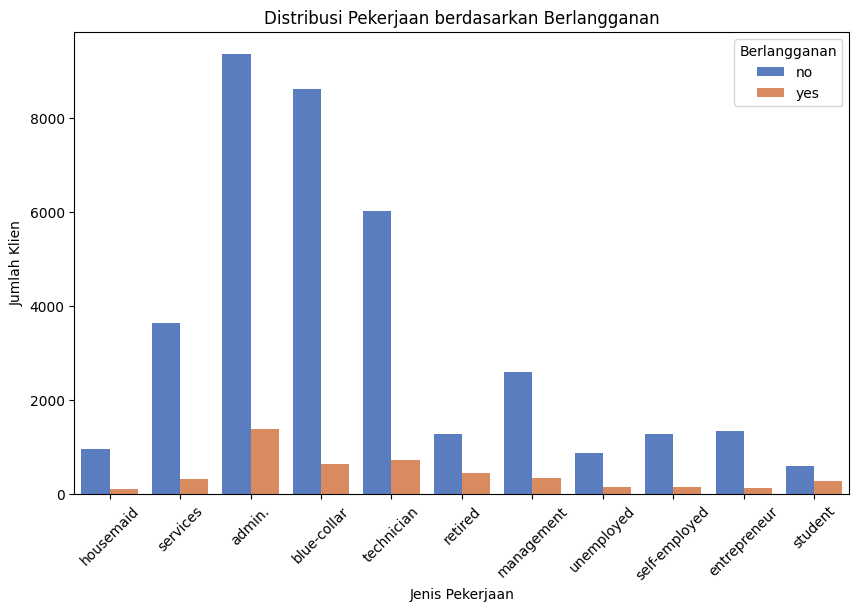

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df, palette='muted')
plt.title('Distribusi Pekerjaan berdasarkan Berlangganan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Klien')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan')
plt.show()

**Interpretasi:**

Target kampanye bisa difokuskan ke pekerjaan dengan rasio “yes” yang tinggi (misalnya: student, retired, admin.).

Segmen seperti blue-collar atau services mungkin perlu pendekatan yang berbeda atau tidak terlalu diutamakan.

### Pengaruh Pendidikan terhadap Berlangganan

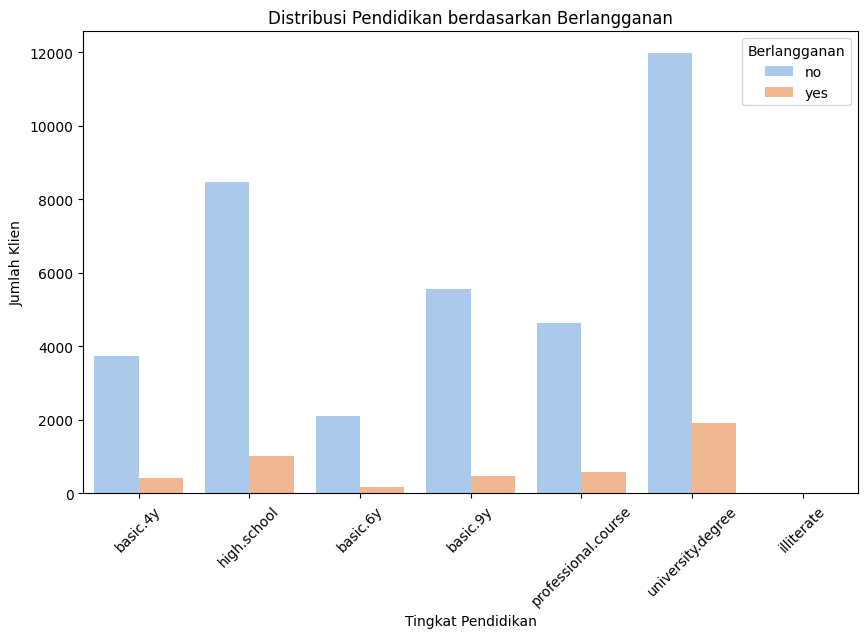

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df, palette='pastel')
plt.title('Distribusi Pendidikan berdasarkan Berlangganan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Klien')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan')
plt.show()

**Interpretasi:**

Mayoritas klien berasal dari kelompok pendidikan university degree dan high school.
Kelompok pendidikan tinggi seperti university degree dan professional course juga 
menunjukkan jumlah pelanggan yang berlangganan (yes) paling banyak, menandakan mereka lebih tertarik atau mampu mengambil produk deposito.

### Analisis Hasil Kampanye Sebelumnya (poutcome)

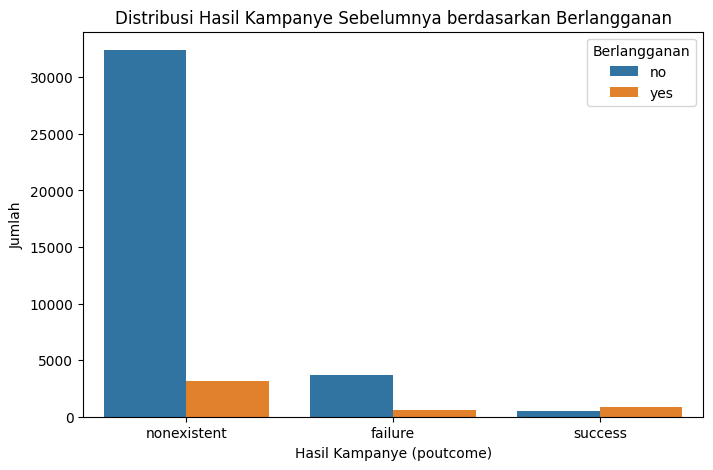

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y')
plt.title('Distribusi Hasil Kampanye Sebelumnya berdasarkan Berlangganan')
plt.xlabel('Hasil Kampanye (poutcome)')
plt.ylabel('Jumlah')
plt.legend(title='Berlangganan')
plt.show()

**Interpretasi:**

Mayoritas klien sebelumnya tidak pernah ikut kampanye (nonexistent), namun dari kelompok ini tetap ada yang berhasil dikonversi.

Klien dengan riwayat kampanye gagal (failure) memiliki rasio berlangganan sangat rendah, menunjukkan efek negatif dari pengalaman buruk sebelumnya.

Sebaliknya, klien dengan riwayat kampanye berhasil (success) memiliki rasio konversi tinggi, meskipun jumlahnya kecil — menandakan bahwa pengalaman positif di masa lalu meningkatkan peluang keberhasilan kampanye saat ini.

### Korelasi Numerik (Heatmap)

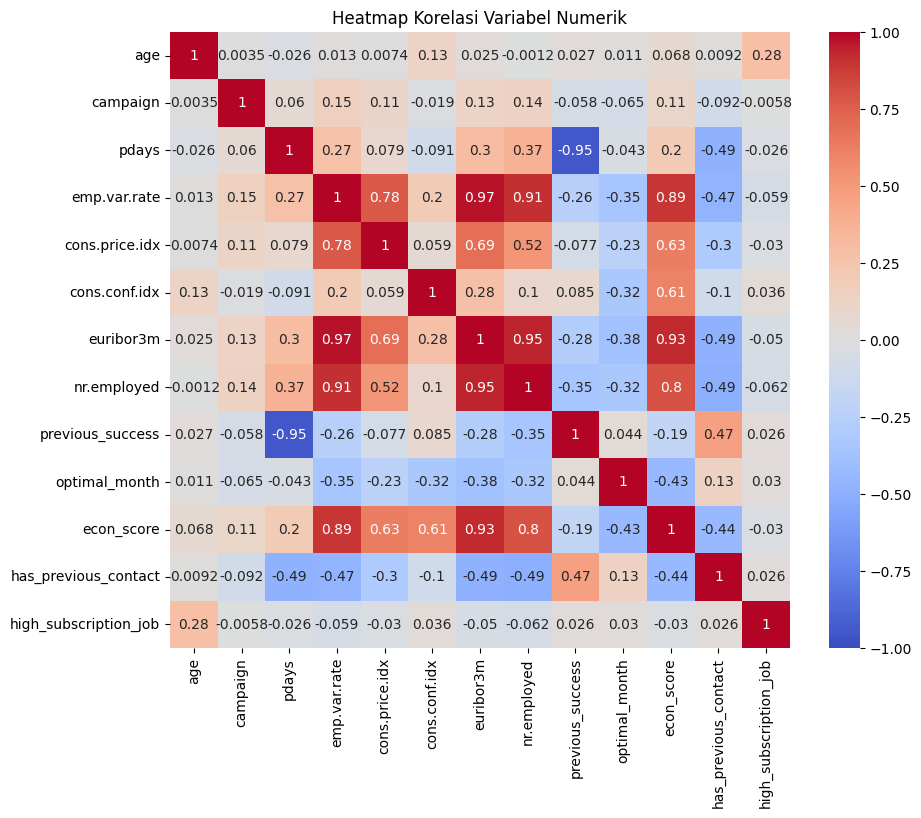

In [57]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

**Interpretasi:**

Terdapat korelasi tinggi antar variabel ekonomi makro seperti 
`emp.var.rate`, `euribor3m`, dan `nr.employed`. 

Sementara variabel seperti `age`, `campaign`, dan `pdays` tidak menunjukkan korelasi kuat, 
menandakan independensi yang baik sebagai prediktor.

**Aksi:**

* Perhatikan potensi **multikolinearitas** di antara variabel ekonomi. Pertimbangkan teknik seperti **PCA** atau regularisasi jika menggunakan model linear.
* Gunakan fitur independen seperti `campaign`, `age`, dan `pdays` sebagai input penting dalam model prediktif.

## Based on Perilaku Ekonomi Makro

### Distribusi Tingkat Variasi Tenaga Kerja (emp.var.rate) Berdasarkan Berlangganan

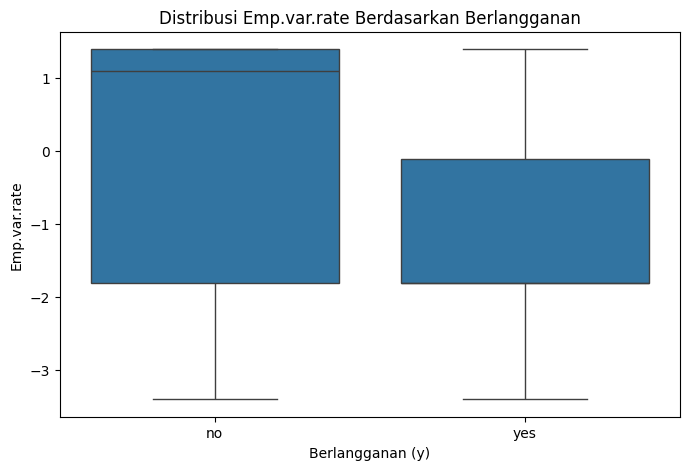

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='emp.var.rate')
plt.title('Distribusi Emp.var.rate Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Emp.var.rate')
plt.show()

**Interpretasi:**

Klien yang berlangganan cenderung berada pada periode dengan `emp.var.rate` negatif, menunjukkan minat terhadap deposito meningkat saat kondisi ekonomi memburuk.
Sebaliknya, saat `emp.var.rate` positif (ekonomi baik), lebih banyak klien yang tidak berlangganan.

Artinya: Deposito lebih diminati saat ekonomi sedang lesu.


### Distribusi Indeks Harga Konsumen (cons.price.idx) Berdasarkan Berlangganan

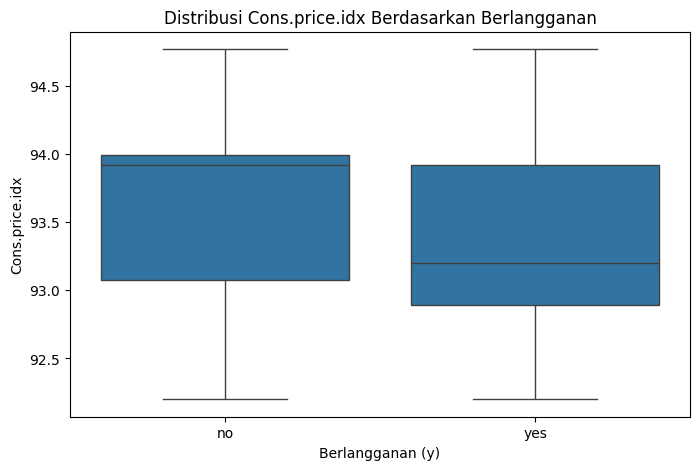

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='cons.price.idx')
plt.title('Distribusi Cons.price.idx Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Cons.price.idx')
plt.show()

**Interpretasi:**

Distribusi `cons.price.idx` antara nasabah yang berlangganan dan tidak berlangganan relatif mirip. Median, kuartil, dan sebarannya menunjukkan perbedaan yang sangat kecil.

Klien lebih banyak berlangganan saat cons.price.idx (indeks harga konsumen) lebih rendah.
Saat CPI tinggi, minat terhadap deposito menurun — kemungkinan karena prioritas kebutuhan harian meningkat.

Deposito lebih diminati saat inflasi konsumen rendah.



### Distribusi Indeks Kepercayaan Konsumen (cons.conf.idx) Berdasarkan Berlangganan

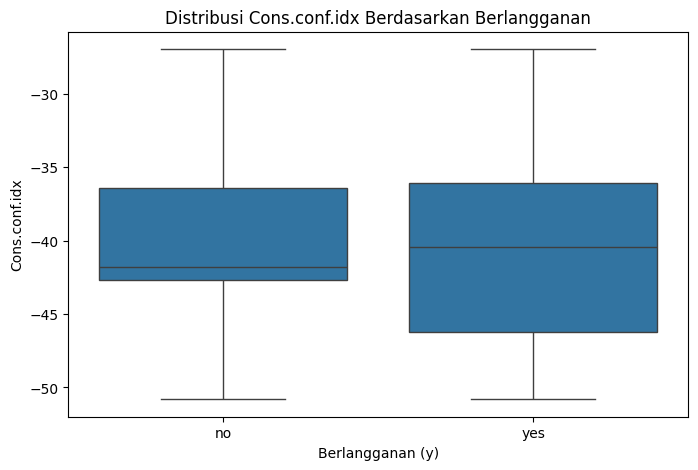

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='cons.conf.idx')
plt.title('Distribusi Cons.conf.idx Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Cons.conf.idx')
plt.show()

**Interpretasi:**

Nasabah yang berlangganan cenderung berada pada periode ketika indeks kepercayaan konsumen (`cons.conf.idx`) bernilai rendah (lebih pesimis). Nasabah lebih banyak berlangganan saat cons.conf.idx (indeks kepercayaan konsumen) lebih rendah atau negatif ekstrem.
Ini menunjukkan bahwa ketika kepercayaan konsumen rendah, minat terhadap deposito justru meningkat — mungkin karena klien mencari instrumen yang lebih aman.

Deposito cenderung dipilih saat konsumen merasa tidak yakin dengan kondisi ekonomi.


### Distribusi Tingkat Euribor 3 Bulan (euribor3m) Berdasarkan Berlangganan

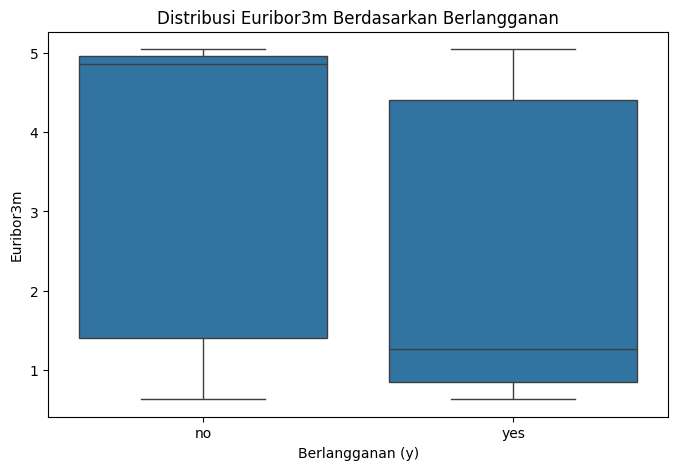

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='euribor3m')
plt.title('Distribusi Euribor3m Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Euribor3m')
plt.show()

**Interpretasi:**

Distribusi memperlihatkan bahwa mayoritas nasabah yang berlangganan terjadi saat nilai `euribor3m` rendah. Nilai tinggi justru diasosiasikan dengan tingkat berlangganan yang rendah. 

Nasabah lebih banyak berlangganan saat euribor3m (suku bunga antarbank Eropa 3 bulan) berada di level rendah.
Sebaliknya, saat euribor3m tinggi, mayoritas klien justru tidak berlangganan.

Deposito cenderung diminati saat suku bunga acuan rendah, kemungkinan karena alternatif investasi lain kurang menarik.

### Distribusi Jumlah Karyawan (nr.employed) Berdasarkan Berlangganan

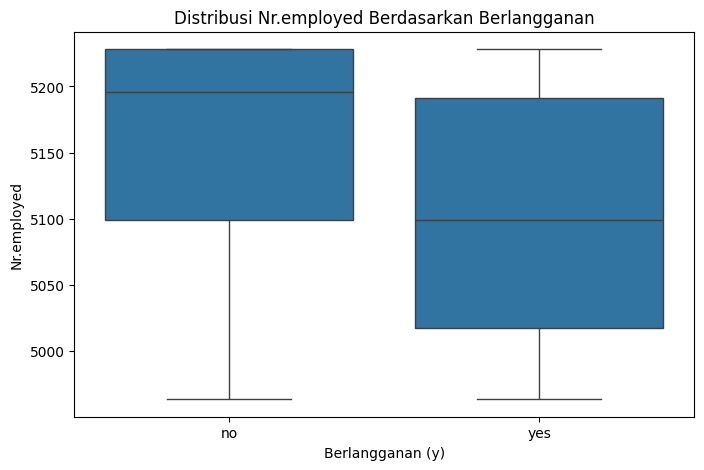

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='nr.employed')
plt.title('Distribusi Nr.employed Berdasarkan Berlangganan')
plt.xlabel('Berlangganan (y)')
plt.ylabel('Nr.employed')
plt.show()

**Interpretasi:**

Sebagian besar nasabah yang berlangganan berada pada saat `nr.employed` relatif lebih rendah, yang merefleksikan pasar tenaga kerja yang sedang melemah atau ketidakpastian ekonomi.

Sebaliknya, saat jumlah tenaga kerja tinggi, mayoritas klien justru tidak berlangganan.

Deposito lebih diminati saat kondisi ketenagakerjaan menurun, karena ketidakpastian ekonomi mendorong preferensi pada instrumen yang lebih aman.

### Heatmap Korelasi Variabel Ekonomi Makro

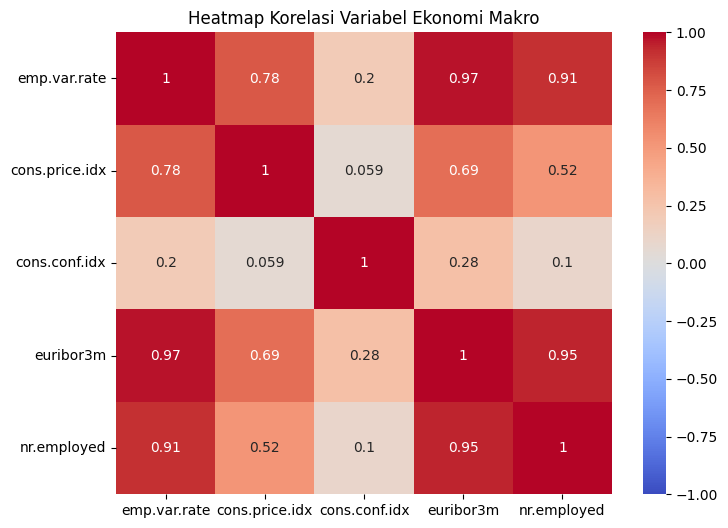

In [63]:
macro_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(8, 6))
sns.heatmap(df[macro_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Variabel Ekonomi Makro')
plt.show()

**Interpretasi:**

Heatmap menunjukkan korelasi sangat tinggi antara beberapa variabel:

* `emp.var.rate` ↔ `euribor3m` (r = 0.97)
* `emp.var.rate` ↔ `nr.employed` (r = 0.91)
* `euribor3m` ↔ `nr.employed` (r = 0.95)

**Aksi:**

* Perlu mitigasi terhadap potensi multikolinearitas saat digunakan dalam model prediktif berbasis regresi/logistik.
* Untuk model berbasis pohon (*tree-based models* seperti XGBoost atau Random Forest), korelasi tinggi ini tidak menjadi masalah besar, tetapi sebaiknya tetap dilakukan validasi terhadap *feature importance* untuk menghindari redundansi informasi.

## Korelasi Antar Variabel

### ⁠Segmen usia vs pendidikan dengan berlangganan

<Figure size 1000x600 with 0 Axes>

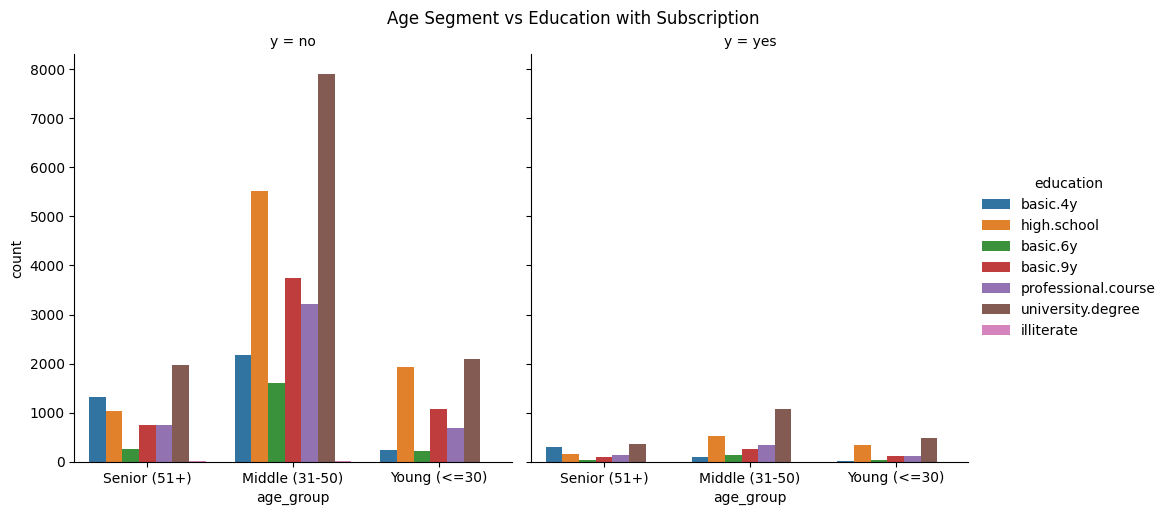

In [64]:
plt.figure(figsize=(10, 6))
sns.catplot(x='age_group', hue='education', col='y', data=df, kind='count', col_wrap=2)
plt.suptitle('Age Segment vs Education with Subscription', y=1.02)
plt.show()

**Interpretasi**: 

* **Usia Menengah Dominan:** Kelompok usia **31-50 tahun (Menengah)** memiliki jumlah tertinggi untuk yang berlangganan maupun tidak, di hampir semua tingkat pendidikan.
* **Pendidikan Tinggi Paling Umum:** 'university.degree' dan 'high.school' adalah tingkat pendidikan yang paling sering terlihat, baik di kalangan pelanggan maupun non-pelanggan.
* **Kelompok Usia Lain Kurang Berlangganan:** Usia Senior (51+) dan Muda (<=30) memiliki jumlah langganan yang jauh lebih rendah dibandingkan usia Menengah.
* **'illiterate' Sangat Jarang:** Kategori 'illiterate' sangat kecil di semua segmen.

**Kesimpulan :** Pelanggan cenderung berasal dari kelompok usia menengah (31-50 tahun) dengan pendidikan tinggi ('university.degree' atau 'high.school'), meskipun kelompok ini juga merupakan bagian terbesar dari non-pelanggan.

### Pekerjaan dan Stabilitas Kampanye

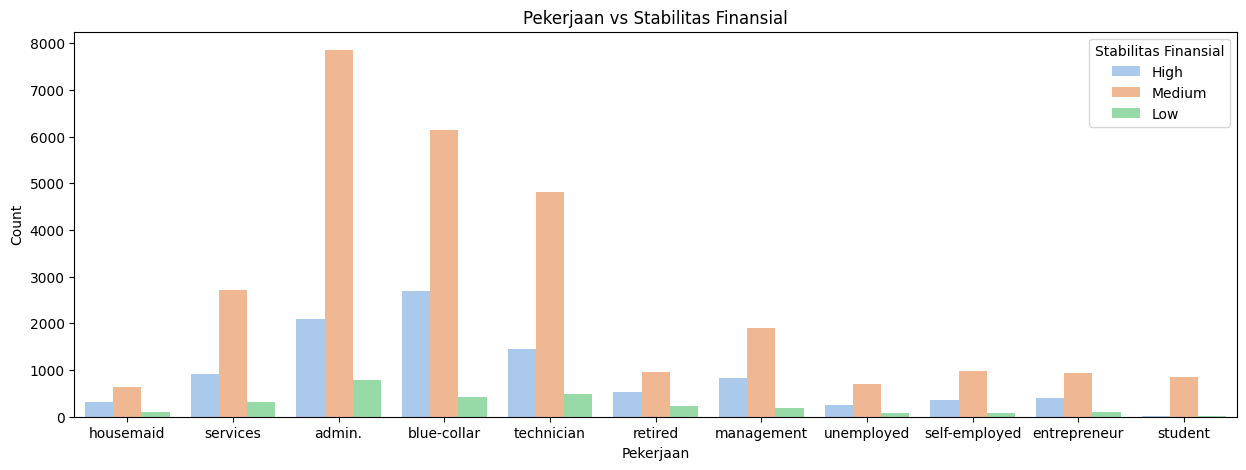

In [65]:

plt.figure(figsize=(15, 5))
sns.countplot(x='job', hue='financial_stability', data=df, palette='pastel')
plt.title('Pekerjaan vs Stabilitas Finansial')
plt.xlabel('Pekerjaan')
plt.ylabel('Count')
plt.legend(title='Stabilitas Finansial')
plt.show()

**Interpretasi**:

* **Pekerjaan Dominan:** Pekerjaan 'admin.', 'blue-collar', dan 'technician' memiliki jumlah individu terbanyak secara keseluruhan.
* **Stabilitas Finansial 'Medium' Paling Banyak:** Hampir di semua jenis pekerjaan, kategori 'Stabilitas Finansial' yang paling dominan adalah 'Medium' (batang oranye), menunjukkan bahwa sebagian besar individu berada pada tingkat stabilitas finansial menengah.
* **Pekerjaan dengan Stabilitas 'High':**
    * 'admin.' memiliki jumlah tertinggi individu dengan stabilitas finansial 'High' (batang biru muda), diikuti oleh 'blue-collar' dan 'technician'.
    * 'management' juga memiliki porsi 'High' yang cukup signifikan relatif terhadap totalnya.
* **Pekerjaan dengan Stabilitas 'Low':**
    * 'admin.' dan 'blue-collar' masih memiliki jumlah terbesar untuk stabilitas finansial 'Low' (batang hijau muda), namun proporsinya jauh lebih kecil dibandingkan 'Medium' atau 'High' dalam pekerjaan tersebut.
    * Beberapa pekerjaan seperti 'unemployed', 'self-employed', 'entrepreneur', dan 'student' juga memiliki representasi 'Low' yang tidak signifikan.
* **Pekerjaan dengan Jumlah Individu Sedikit:** Pekerjaan seperti 'unemployed', 'student', 'entrepreneur', 'self-employed', 'housemaid', dan 'retired' memiliki jumlah individu yang relatif lebih sedikit di semua kategori stabilitas finansial.

**Kesimpulan:**
Sebagian besar individu dalam dataset ini memiliki stabilitas finansial 'Medium'. Pekerjaan 'admin.', 'blue-collar', dan 'technician' adalah yang paling banyak populasinya, dan mereka juga memiliki kontribusi terbesar pada kategori stabilitas finansial 'High'.

### Demografis: Status Perkawinan dan Pinjaman

<Figure size 1000x600 with 0 Axes>

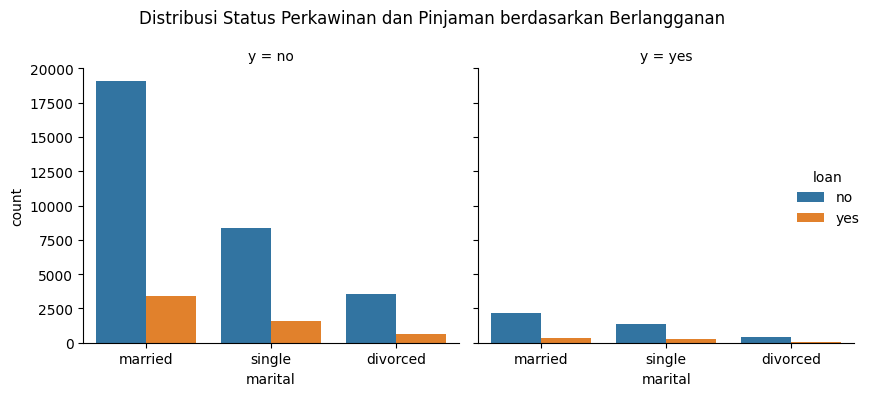

In [66]:
plt.figure(figsize=(10, 6))
sns.catplot(x='marital', hue='loan', col='y', data=df, kind='count', height=4, aspect=1)
plt.suptitle('Distribusi Status Perkawinan dan Pinjaman berdasarkan Berlangganan')
plt.tight_layout()
plt.show()

**Interpretasi**: 

* **'married' Paling Dominan:** Status perkawinan 'married' (menikah) adalah yang paling umum di kedua kelompok (berlangganan dan tidak), diikuti oleh 'single' dan 'divorced'.
* **Mayoritas Tanpa Pinjaman:** Baik di kalangan berlangganan maupun non-Berlangganan, mayoritas individu tidak memiliki pinjaman ('loan = no') dibandingkan dengan yang memiliki pinjaman ('loan = yes').

**Kesimpulan:** Berlangganan cenderung adalah individu yang sudah menikah dan tidak memiliki pinjaman, meskipun demografi ini juga merupakan mayoritas di antara non-Berlangganan. Secara umum, yang memiliki pinjaman ('loan = yes') cenderung berkorelasi dengan tingkat langganan yang lebih rendah.

### Temporal: Musiman dan Demografis


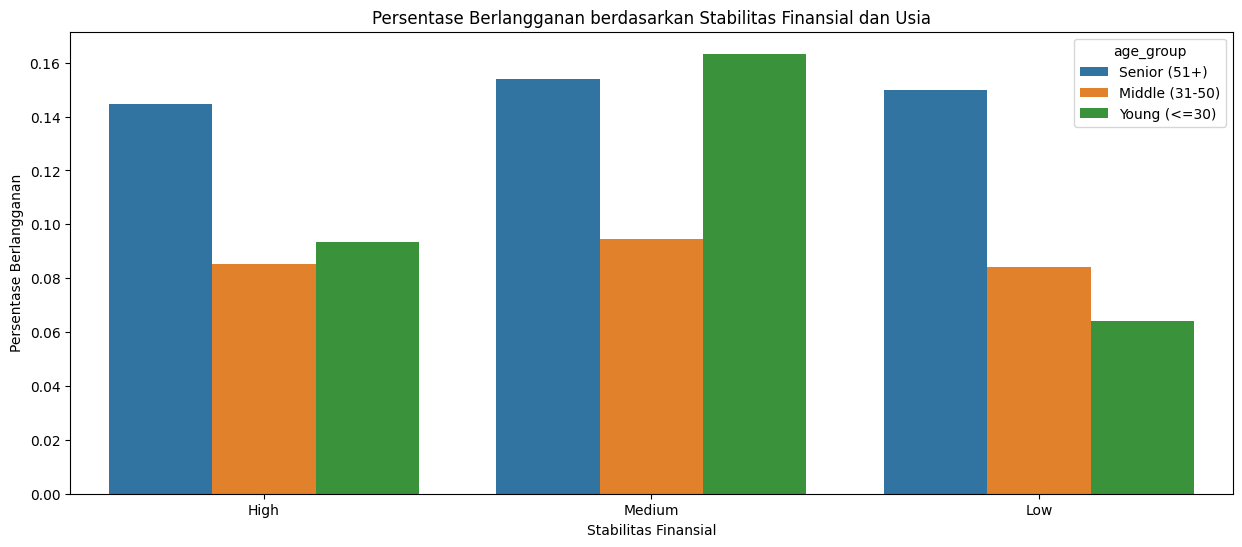

In [67]:
#ubah month agar berurutan
month_order = [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
plt.figure(figsize=(15, 6))
sns.barplot(x='financial_stability', y=df['y'].map({'yes': 1, 'no': 0}), data=df, estimator=lambda x: sum(x == 1) / len(x), hue='age_group', ci=None)
plt.title('Persentase Berlangganan berdasarkan Stabilitas Finansial dan Usia')
plt.xlabel('Stabilitas Finansial')
plt.ylabel('Persentase Berlangganan')
plt.show()

**Interpretasi**:

* **Stabilitas Finansial 'Medium':** Kelompok usia **Young (<=30)** memiliki persentase berlangganan tertinggi (sekitar 16%) saat stabilitas finansial mereka 'Medium'.
* **Stabilitas Finansial 'High':** Kelompok usia **Senior (51+)** memiliki persentase berlangganan tertinggi (sekitar 14.5%) di antara kelompok dengan stabilitas finansial 'High'.
* **Stabilitas Finansial 'Low':** Kelompok usia **Senior (51+)** juga memiliki persentase berlangganan tertinggi (sekitar 15%) di antara kelompok dengan stabilitas finansial 'Low'.
* **Kelompok 'Middle (31-50)':** Kelompok ini secara konsisten memiliki persentase berlangganan terendah di semua kategori stabilitas finansial (berkisar antara 8% - 9%).
* **Kelompok 'Young (<=30)':** Menunjukkan variasi yang signifikan: sangat tinggi pada stabilitas finansial 'Medium', dan yang terendah pada stabilitas finansial 'Low'.

**Kesimpulan:**
* **Kelompok Usia Senior (51+)** menunjukkan tingkat berlangganan yang relatif konsisten dan tinggi di berbagai tingkat stabilitas finansial.
* **Kelompok Usia Muda (<=30)** adalah yang paling mungkin berlangganan jika mereka memiliki stabilitas finansial 'Medium'.
* **Kelompok Usia Menengah (31-50)** adalah yang paling sedikit berlangganan, terlepas dari tingkat stabilitas finansial mereka.

### Stabilitas Kampa dan Poutcome

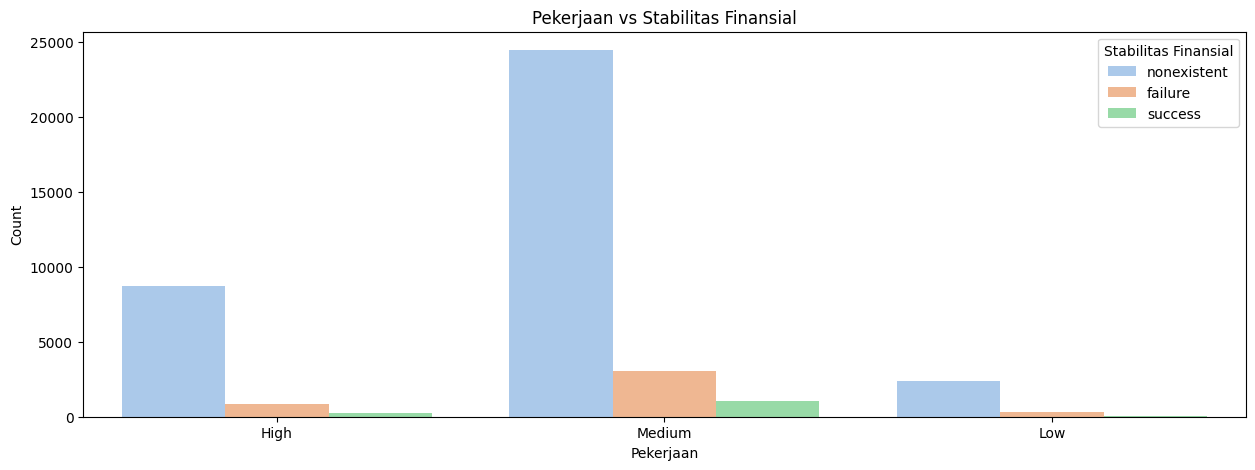

In [68]:
plt.figure(figsize=(15, 5))
sns.countplot(x='financial_stability', hue='poutcome', data=df, palette='pastel')
plt.title('Pekerjaan vs Stabilitas Finansial')
plt.xlabel('Pekerjaan')
plt.ylabel('Count')
plt.legend(title='Stabilitas Finansial')
plt.show()

**Interpretasi**:

* **Mayoritas Tidak Ada Hasil Kampanye/Campaign = Nonexistent:** Di semua tingkat stabilitas finansial (High, Medium, Low), jumlah terbesar adalah untuk kategori 'nonexistent' (batang biru muda), menunjukkan bahwa sebagian besar individu belum pernah dihubungi untuk kampanye pemasaran atau tidak ada hasil yang tercatat.
* **Stabilitas Finansial 'Medium' Paling Dominan:** Kategori 'Medium' memiliki jumlah individu terbesar secara keseluruhan, baik untuk 'nonexistent', 'failure', maupun 'success'.
    * Ada sekitar 24,000+ individu dengan stabilitas finansial 'Medium' yang hasilnya 'nonexistent'.
    * Sekitar 3,000+ individu dengan stabilitas finansial 'Medium' mengalami 'failure'.
    * Sekitar 1,000+ individu dengan stabilitas finansial 'Medium' mengalami 'success'.
* **Stabilitas Finansial 'High':**
    * Memiliki jumlah 'nonexistent' yang cukup tinggi (sekitar 9,000+).
    * Jumlah 'failure' dan 'success' jauh lebih kecil dibandingkan 'nonexistent' di kategori ini.
* **Stabilitas Finansial 'Low':**
    * Memiliki jumlah 'nonexistent' yang signifikan (sekitar 2,500+), namun lebih rendah dari 'High' dan 'Medium'.
    * Jumlah 'failure' dan 'success' sangat kecil di kategori ini.
* **Hasil 'Success' Terendah:** Di semua kategori stabilitas finansial, 'success' (batang hijau muda) memiliki jumlah yang paling rendah dibandingkan 'nonexistent' atau 'failure'.

**Kesimpulan:**
Sebagian besar individu belum memiliki riwayat kampanye ('nonexistent'). Individu dengan stabilitas finansial 'Medium' adalah kelompok terbesar di semua hasil kampanye (nonexistent, failure, success). Tingkat keberhasilan kampanye ('success') secara umum sangat rendah di semua tingkat stabilitas finansial.

### Kesimpulan Insight

**Potensi Terbesar Ada pada Usia Menengah dengan Pendidikan Tinggi**:

- Kelompok usia 31-50 tahun (Menengah) adalah demografi terbesar di dataset kita, baik di kalangan pelanggan maupun non-pelanggan.

- Mereka yang memiliki pendidikan Universitas (university.degree) dan Sekolah Menengah Atas (high.school) juga merupakan segmen pendidikan terbesar di kedua kelompok (berlangganan & tidak).

- Implikasi: Kampanye pemasaran massal kemungkinan akan paling efektif jika menargetkan kelompok usia menengah ini, khususnya dengan fokus pada latar belakang pendidikan tersebut. Namun, karena mereka juga mayoritas di non-pelanggan, kita perlu strategi yang lebih spesifik untuk mengonversi mereka.

**Stabilitas Finansial Menengah adalah Kunci, Terutama untuk Kaum Muda**:

- Sebagian besar individu dalam dataset kita memiliki stabilitas finansial 'Medium'.

- Menariknya, kaum muda (<=30 tahun) menunjukkan persentase berlangganan tertinggi (sekitar 16%) saat mereka memiliki stabilitas finansial 'Medium'.

- Implikasi: Ada peluang besar untuk menargetkan segmen usia muda dengan stabilitas finansial menengah. Pahami kebutuhan mereka dan tawarkan produk yang relevan untuk menarik mereka.

**Pelanggan Cenderung Berstatus Menikah dan Tidak Memiliki Pinjaman**:

- Individu yang menikah (married) dan tidak memiliki pinjaman (loan = no) adalah demografi yang dominan di antara pelanggan kita.

- Implikasi: Pertimbangkan untuk menyesuaikan pesan pemasaran agar sesuai dengan gaya hidup dan prioritas rumah tangga yang sudah menikah. Prioritaskan target yang tidak memiliki beban pinjaman personal, karena mereka cenderung lebih terbuka terhadap penawaran.

**Pekerjaan Administratif dan Blue-Collar Dominan**:

- Profesi seperti 'admin.', 'blue-collar', dan 'technician' adalah yang paling banyak populasinya dalam dataset, dan mayoritas dari mereka memiliki stabilitas finansial 'Medium'.

- Implikasi: Saluran dan pesan pemasaran harus mempertimbangkan karakteristik dan kebiasaan kelompok profesi ini.

**Tantangan Konversi dan Pentingnya Riwayat Kampanye**:

- Tingkat keberhasilan kampanye sebelumnya ('success') sangat rendah di semua tingkat stabilitas finansial. Mayoritas individu tidak memiliki riwayat kampanye ('nonexistent').

- Implikasi: Ini menunjukkan bahwa strategi kampanye sebelumnya mungkin belum optimal. Ada banyak "lapangan kosong" (nonexistent) yang bisa dieksplorasi. Kita perlu menguji pendekatan baru dan lebih personal untuk meningkatkan tingkat konversi, daripada hanya mengandalkan metode yang sama.

- Jangan terpaku pada kegagalan masa lalu. Ada potensi besar pada segmen pasar yang belum dijangkau, terutama kelompok usia menengah dengan pendidikan tinggi.

# **Machine Learning**

Dalam proses machine learning, kami menggunakan data yang telah melalui tahap pembersihan awal tanpa menerapkan feature engineering lanjutan. Beberapa penyesuaian tetap dilakukan untuk meningkatkan kualitas data, seperti penghapusan kolom yang berpotensi menyebabkan data leakage, pengelompokan variabel `pdays` menjadi kategori, serta penanganan multikolinearitas melalui eliminasi fitur dengan korelasi tinggi. Selain itu, variabel target diubah dari `y` menjadi `deposit` untuk kejelasan interpretasi. Pendekatan ini bertujuan untuk menjaga struktur alami data sekaligus meminimalkan bias dari transformasi berlebih.

## Data Preparation

In [13]:
df_ml = pd.read_csv('./Data/data-clean.csv')
pd.set_option('display.max_columns', None)
df_ml

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,not_contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69,retired,married,professional.course,yes,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,cellular,nov,fri,1,999,not_contacted,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Multicollinearity Handling
Untuk memastikan kestabilan model dan menghindari redundansi informasi antar fitur numerik, dilakukan analisis korelasi melalui matriks Pearson.

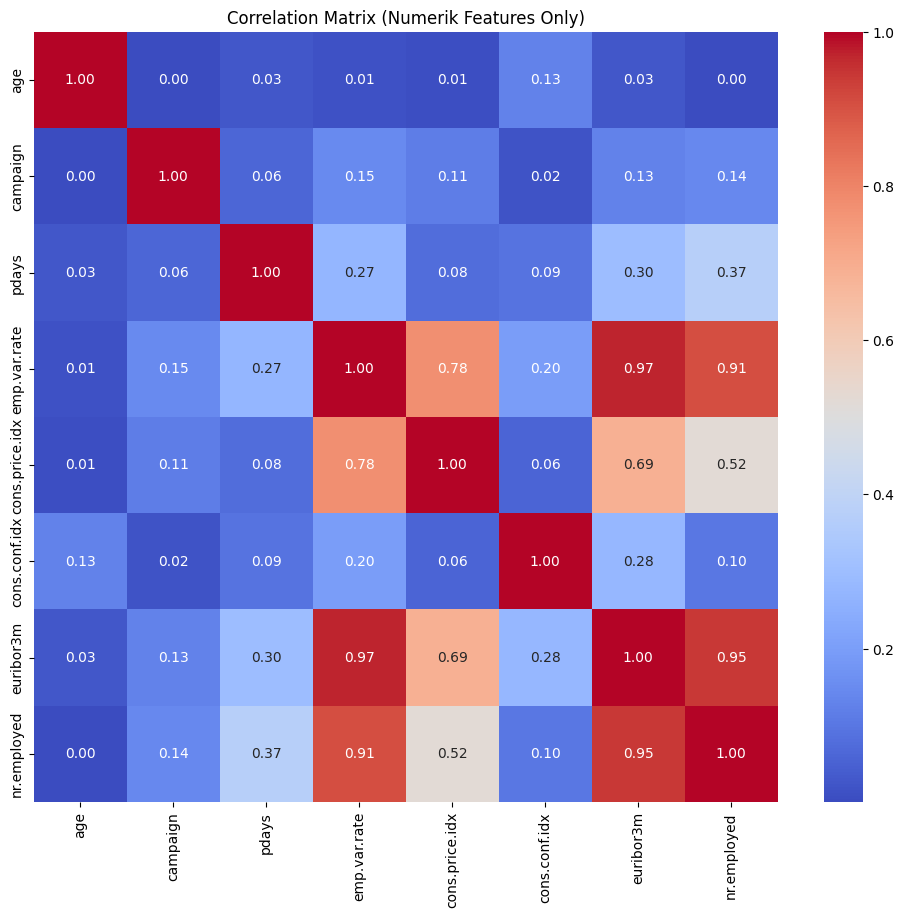

Fitur yang di-drop karena multikol:
['euribor3m', 'nr.employed']


In [14]:
# 1. Copy data & drop target
df_temp = df_ml.copy()
df_temp = df_temp.drop(columns='y')

# 2. Pilih kolom numerik aja
num_cols = df_temp.select_dtypes(include=['int64', 'float64']).columns
df_num = df_temp[num_cols]

# 3. Hitung korelasi
corr_matrix = df_num.corr().abs()

# 4. Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerik Features Only)")
plt.show()

# 5. Hapus fitur multikol (korelasi > 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print("Fitur yang di-drop karena multikol:")
print(to_drop)

# 6. Drop dari dataframe asli
df_cleaned = df_ml.drop(columns=to_drop)

# df_cleaned sekarang siap buat modeling tanpa multikol

Hasilnya menunjukkan adanya multikolinearitas tinggi di antara beberapa variabel, terutama `euribor3m` dan `nr.employed`, yang memiliki korelasi sangat kuat terhadap `emp.var.rate` (masing-masing sebesar 0.97 dan 0.91).

Karena korelasi di atas ambang batas toleransi (umumnya 0.9), kami memutuskan untuk mengeliminasi `euribor3m` dan `nr.employed` dari dataset. Keputusan ini bertujuan untuk mengurangi potensi bias dan overfitting akibat informasi yang tumpang tindih, serta meningkatkan interpretabilitas model. Variabel `emp.var.rate` tetap dipertahankan karena dianggap lebih representatif secara ekonomi dan memiliki relevansi tinggi terhadap variabel target.

### Mengubah nama target dan mengubah yes dan no menjadi 1 dan 0

In [15]:
df_model = df_cleaned.rename(columns={'y': 'deposit'})
df_model['deposit'] = np.where(df_model['deposit'] == 'yes', 1, 0)

### Mengubah `pdays` menjadi group

Nilai 999 artinya belum pernah dihubungi sebelumnya, sehingga 999 bikin hasil scaling kacau. Model bisa salah menganggap 999 sebagai jarak yang sangat jauh, padahal itu arti "tidak pernah dihubungi"

In [16]:
def group_pdays(x):
    if x == 999:
        return 'never_contacted'
    elif x <= 5:
        return 'recent'
    else:
        return 'contacted_before'

df_model['pdays_group'] = df_model['pdays'].apply(group_pdays)

# drop fitur pdays
df_model.drop(columns=['pdays'], inplace=True)

In [17]:
# export df_model ke csv
df_model.to_csv('./Data/data-model.csv', index=False)
df_model

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,deposit,pdays_group
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,not_contacted,nonexistent,1.1,93.994,-36.4,0,never_contacted
1,57,services,married,high.school,no,no,telephone,may,mon,1,not_contacted,nonexistent,1.1,93.994,-36.4,0,never_contacted
2,37,services,married,high.school,yes,no,telephone,may,mon,1,not_contacted,nonexistent,1.1,93.994,-36.4,0,never_contacted
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,not_contacted,nonexistent,1.1,93.994,-36.4,0,never_contacted
4,56,services,married,high.school,no,yes,telephone,may,mon,1,not_contacted,nonexistent,1.1,93.994,-36.4,0,never_contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69,retired,married,professional.course,yes,no,cellular,nov,fri,1,not_contacted,nonexistent,-1.1,94.767,-50.8,1,never_contacted
41172,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,not_contacted,nonexistent,-1.1,94.767,-50.8,0,never_contacted
41173,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,not_contacted,nonexistent,-1.1,94.767,-50.8,0,never_contacted
41174,44,technician,married,professional.course,no,no,cellular,nov,fri,1,not_contacted,nonexistent,-1.1,94.767,-50.8,1,never_contacted


### Data Split

In [18]:
transformer = ColumnTransformer([
    # Ordinal encoding
    ('ordinal', OrdinalEncoder(), ['education']),

    # One-hot encoding
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
     ['marital', 'housing', 'loan', 'contact', 'pdays_group', 'previous', 'poutcome']),

    # binary encoding
    ('binary', BinaryEncoder(),     
     ['job', 'month', 'day_of_week']),

    # Scaling
    ('scaler', RobustScaler(), ['age','campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'])
])

#### Define Feature (X) and Target (y)

In [19]:
# Features (X)
X = df_model.drop(columns='deposit')

# Target (y)
y = df_model['deposit']

In [20]:
# Splitting the data into training and test sets with an 80:20 ratio using stratified sampling

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.2,
    stratify=y,
    random_state=42)

### Pemilihan Metode Resampling

In [21]:
y_train.value_counts()

deposit
0    29229
1     3711
Name: count, dtype: int64

Dalam dataset yang berisi 38.509 data, proporsi label target menunjukkan ketimpangan signifikan: sekitar 88,7% merupakan data negatif (tidak berlangganan), sementara hanya 11,3% yang positif (berlangganan). Temuan ini terlihat jelas saat dilakukan EDA, di mana dominasi kelas negatif mencolok secara visual maupun numerik. Ketidakseimbangan seperti ini dapat memengaruhi pembelajaran model, karena algoritma cenderung 'bermain aman' dengan memprediksi kelas mayoritas, sehingga performanya terhadap kelas minoritas jadi lemah. Maka dari itu, diperlukan perlakuan khusus terhadap data agar model dapat mengenali kedua kelas secara adil dan menyeluruh.

Dalam kasus klasifikasi yang tidak seimbang, model cenderung **berpihak pada kelas mayoritas**, sehingga performa terhadap kelas minoritas (yang seringkali lebih penting) menjadi buruk. Untuk mengatasi ini, terdapat beberapa teknik **resampling** yang umum digunakan:

1. **Oversampling**
adalah teknik yang digunakan untuk **meningkatkan jumlah data pada kelas minoritas**, sehingga distribusi kelas menjadi lebih seimbang dengan kelas mayoritas.

    **Metode yang umum digunakan:**

    * **RandomOverSampler**: Menggandakan sampel dari kelas minoritas secara acak.
    * **SMOTE (Synthetic Minority Oversampling Technique)**: Membuat sampel sintetis berdasarkan interpolasi antara data minoritas yang ada.
    * **ADASYN (Adaptive Synthetic Sampling)**: Varian dari SMOTE yang lebih fokus menciptakan sampel sintetis di daerah yang sulit dipelajari oleh model.

    **Kelebihan:**

    * Mempertahankan seluruh data mayoritas.
    * Mengurangi bias terhadap kelas mayoritas.

    **Kekurangan:**

    * Risiko overfitting, terutama pada metode random.

2. **Undersampling**
adalah pendekatan untuk **mengurangi jumlah data pada kelas mayoritas** agar sebanding dengan kelas minoritas.

    **Metode yang umum digunakan:**

    * **RandomUnderSampler**: Menghapus sampel dari kelas mayoritas secara acak.
    * **Edited Nearest Neighbours (ENN)**: Menghapus sampel mayoritas yang salah diklasifikasikan oleh k-nearest neighbors.
    * **NearMiss**: Memilih subset dari kelas mayoritas yang paling mirip (atau berbeda) dengan kelas minoritas berdasarkan jarak.

    **Kelebihan:**

    * Mengurangi waktu pelatihan model.
    * Menghindari overfitting terhadap data mayoritas.

    **Kekurangan:**

    * Risiko kehilangan informasi penting dari kelas mayoritas.

3. **Hybrid Sampling**
Kombinasi antara oversampling dan undersampling untuk **mencapai keseimbangan yang lebih efektif dan alami** antar kelas.

    **Metode yang umum digunakan:**
    * **SMOTE + ENN**: Setelah SMOTE menghasilkan sampel sintetis, ENN digunakan untuk membersihkan data yang "noise" atau kurang representatif.
    * **SMOTE + RandomUnderSampler (RUS)**: Gabungan oversampling dengan pengurangan data mayoritas secara acak.

    **Kelebihan:**

    * Memadukan kekuatan dari kedua pendekatan.
    * Lebih stabil dibanding hanya oversampling atau undersampling saja.

    **Kekurangan:**

    * Lebih kompleks dan memerlukan tuning parameter yang tepat.

Merubah kolom kategori menjadi numerik untuk resampling, karena resampling hanya menerima proses numerik

In [22]:
# Menentukan indeks kolom kategorik
cat_feat = [
    'education', 'marital', 'housing', 'loan', 'contact',
    'pdays_group', 'previous', 'poutcome',
    'job', 'month', 'day_of_week'
]
cat_ind = [X_train.columns.get_loc(col) for col in cat_feat]

In [23]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test) 

**Metode Sampling**

In [24]:
ros = RandomOverSampler(random_state=42)
X_train_over_ros, y_train_over_ros = ros.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_over_smote, y_train_over_smote = smote.fit_resample(X_train, y_train)

adasyn = ADASYN(random_state=42)
X_train_over_adasyn, y_train_over_adasyn = adasyn.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)
X_train_under_rus, y_train_under_rus = rus.fit_resample(X_train, y_train)

enn = EditedNearestNeighbours()
X_train_under_enn, y_train_under_enn = enn.fit_resample(X_train, y_train)

nearmiss = NearMiss()
X_train_under_nearmiss, y_train_under_nearmiss = nearmiss.fit_resample(X_train, y_train)

smote_enn = SMOTEENN(random_state=42)
X_train_hybrid_smote_enn, y_train_hybrid_smote_enn = smote_enn.fit_resample(X_train_over_smote, y_train_over_smote)

undersampler = RandomUnderSampler(random_state=42)
X_train_hybrid_undersampler, y_train_hybrid_undersampler = undersampler.fit_resample(X_train_over_smote, 
                                                                                     y_train_over_smote)

In [25]:
sampling_methods = {
    "Random OverSampler": RandomOverSampler(random_state=42).fit_resample(X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train),
    "ADASYN": ADASYN(random_state=42).fit_resample(X_train, y_train),
    "Random UnderSampler": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train),
    "Edited Nearest Neighbours": EditedNearestNeighbours().fit_resample(X_train, y_train),
    "NearMiss": NearMiss().fit_resample(X_train, y_train),
    "SMOTE + ENN": SMOTEENN(random_state=42).fit_resample(X_train, y_train),
    "SMOTE + RUS": RandomUnderSampler(random_state=42).fit_resample
    (SMOTE(random_state=42).fit_resample(X_train, y_train)[0],SMOTE(random_state=42).fit_resample(X_train, y_train)[1])
}

### Pemilihan Model

Setiap model dipilih karena memiliki karakteristik unik yang dapat memberikan keunggulan tertentu dalam proses klasifikasi, tergantung pada struktur dan kompleksitas data.

* **Logistic Regression** merupakan model linear yang sangat cepat dan mudah diinterpretasikan. Sifat parametrisnya memungkinkan pemahaman yang jelas terhadap kontribusi tiap fitur, menjadikannya sangat cocok untuk baseline model dan situasi di mana interpretabilitas menjadi prioritas.

* **K-Nearest Neighbors (KNN)** sangat sederhana dan intuitif karena tidak memerlukan proses pelatihan (lazy learning). Model ini efektif digunakan ketika distribusi kelas dapat dipetakan dengan baik melalui kedekatan jarak antar data.

* **Decision Tree** memberikan struktur model yang mudah dipahami dan divisualisasikan. Ia bekerja baik dalam menangkap pola non-linear dan mampu memodelkan interaksi antar fitur tanpa memerlukan banyak preprocessing.

* **Random Forest** mengatasi kelemahan Decision Tree dengan menggabungkan banyak pohon melalui teknik bagging, sehingga menghasilkan prediksi yang lebih stabil dan tahan terhadap overfitting. Model ini juga secara otomatis menangani fitur penting melalui mekanisme voting.

* **AdaBoost** efektif dalam meningkatkan performa model sederhana dengan cara berfokus pada kesalahan sebelumnya. Sangat cocok digunakan pada data yang bersih, karena mampu memperkuat prediksi secara bertahap.

* **Gradient Boosting** dikenal memiliki akurasi tinggi karena kemampuannya dalam membangun model secara iteratif dan memperbaiki error pada tahap sebelumnya. Fleksibilitasnya memungkinkan penyesuaian dengan berbagai jenis data dan kebutuhan.

* **LightGBM** unggul dalam kecepatan dan efisiensi, terutama pada dataset besar. Algoritma leaf-wise growth-nya mempercepat proses pelatihan tanpa mengorbankan akurasi, menjadikannya pilihan ideal untuk deployment skala besar.

* **XGBoost** adalah model boosting yang sangat powerful dengan fitur regularisasi internal yang mampu mengurangi overfitting secara efektif. Ia juga dilengkapi dengan optimasi kinerja dan kemampuan parallel computing.

* **CatBoost** dirancang khusus untuk menangani fitur kategorikal secara native tanpa perlu preprocessing seperti one-hot encoding. Ini sangat mempermudah pipeline dan mengurangi risiko kehilangan informasi penting dari variabel kategorikal.


In [26]:
# Inisialisasi model
lr = LogisticRegression(random_state=42, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(verbose=-1)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)

# Gabungkan ke dictionary
models = {
    'Logistic Regression': lr,
    'KNN': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Gradient Boosting': gbm,
    'Light GBM': lgbm,
    'Xgboost': xgb,
    'CatBoost': cat
}

## Modeling
Untuk mendapatkan model klasifikasi terbaik dan paling sesuai dengan karakteristik data, kami menerapkan pendekatan modeling secara bertahap dan sistematis sebagai berikut:

1. **Eksplorasi Model Tanpa Resampling**
   
   Langkah awal adalah mengevaluasi performa berbagai algoritma klasifikasi tanpa menerapkan teknik penyeimbangan data. Tujuannya adalah untuk memahami baseline performa model secara alami berdasarkan distribusi asli data.

2. **Eksplorasi Model dengan Resampling**
   
   Selanjutnya, kami menerapkan teknik resampling (seperti SMOTE, NearMiss, dan lainnya) untuk menangani ketidakseimbangan kelas, kemudian menguji ulang performa seluruh model. Ini dilakukan untuk mengidentifikasi model yang menunjukkan peningkatan performa setelah data diseimbangkan.

3. **Seleksi Lima Model Terbaik untuk Evaluasi Mendalam**
   
   Berdasarkan hasil dari langkah 1 dan 2, kami memilih lima model dengan performa terbaik untuk diuji lebih lanjut menggunakan teknik **cross-validation** dan analisis potensi **overfitting**. Hal ini dilakukan untuk mengevaluasi stabilitas dan generalisasi model.

4. **Voting Classifier dengan Tiga Model Terpilih**
   
   Dari lima model yang telah diseleksi, tiga model dengan karakteristik yang saling melengkapi akan dikombinasikan dalam bentuk **Voting Classifier** (baik hard maupun soft voting). Pendekatan ensemble ini diharapkan mampu menggabungkan keunggulan masing-masing model dan menghasilkan prediksi yang lebih robust.

5. **Pemilihan Model Terbaik untuk Hyperparameter Tuning**
   
   Berdasarkan seluruh hasil eksperimen sebelumnya (langkah 1–4), satu model dengan performa terbaik dan konsisten akan dipilih sebagai kandidat utama. Model ini kemudian akan dioptimasi lebih lanjut melalui proses **hyperparameter tuning** untuk memaksimalkan akurasi dan generalisasi.

6. **Penyesuaian Threshold Klasifikasi**
   
   Setelah diperoleh model terbaik yang telah dituning, dilakukan eksperimen dengan **penyesuaian threshold** untuk mengatur trade-off antara recall dan precision, khususnya pada kasus di mana salah satu metrik tersebut menjadi prioritas bisnis.

7. **Finalisasi Model**
   
   Model akhir ditentukan berdasarkan evaluasi menyeluruh dari seluruh tahapan di atas, dengan mempertimbangkan performa pada data uji, stabilitas, kemampuan generalisasi, dan relevansi terhadap konteks permasalahan bisnis. Model ini kemudian dijadikan sebagai model final untuk deployment atau rekomendasi.

### Eksplorasi Model Tanpa Resampling

Sebagai langkah awal dalam proses pemodelan, kami melakukan evaluasi terhadap berbagai algoritma klasifikasi tanpa menerapkan teknik penyeimbangan data (resampling). Tujuan dari tahap ini adalah untuk memperoleh baseline performa masing-masing model dalam kondisi distribusi data asli, yang diketahui tidak seimbang.

In [ ]:
def evaluate_models(models, X_train, y_train, X_test, y_test, description, all_results):
    
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluasi metrik
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
        recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
        f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
        f2 = fbeta_score(y_test, y_pred, beta=2, average='binary', pos_label=1)

        # Simpan hasil
        results.append([name, description, recall, precision, f1, f2, acc])

    df_results = pd.DataFrame(results, columns=[
        'Model', 'Resampling Method', 'Recall', 'Precision', 'F1-score', 'F2-score', 'Accuracy'
    ])

    all_results.append(df_results)

    return df_results.nlargest(8, 'F1-score')  # atau bisa pakai F2 juga kalau kamu mau

# Inisialisasi list untuk menyimpan semua hasil evaluasi
all_results = []

# Evaluasi model tanpa resampling
model_wo_resampling = evaluate_models(models, X_train, y_train, X_test, y_test, "Tanpa Resampling", all_results)
model_wo_resampling


,Model,Resampling Method,Recall,Precision,F1-score,F2-score,Accuracy
7,Xgboost,Tanpa Resampling,0.282328,0.592760,0.382482,0.315359,0.897280
3,Random Forest,Tanpa Resampling,0.289871,0.538000,0.376751,0.319326,0.891938
8,CatBoost,Tanpa Resampling,0.264009,0.610973,0.368698,0.297836,0.898130
6,Light GBM,Tanpa Resampling,0.238147,0.622535,0.344505,0.271699,0.897887
5,Gradient Boosting,Tanpa Resampling,0.227371,0.651235,0.337061,0.261397,0.899223
1,KNN,Tanpa Resampling,0.241379,0.534606,0.332591,0.271121,0.890845
0,Logistic Regression,Tanpa Resampling,0.218750,0.642405,0.326367,0.251986,0.898252
2,Decision Tree,Tanpa Resampling,0.185345,0.674510,0.290786,0.216789,0.898130


Walaupun sebagian model menunjukkan akurasi tinggi (mendekati 90%), performa recall terhadap **kelas minoritas masih sangat rendah**, dengan nilai tertinggi hanya sekitar **28%**. Hal ini menandakan bahwa model gagal mengenali banyak kasus positif yang seharusnya terdeteksi.

Oleh karena itu, kami melanjutkan ke tahap berikutnya yaitu **eksplorasi model dengan teknik resampling** untuk menangani ketidakseimbangan kelas dan meningkatkan sensitivitas model terhadap kelas minoritas.

### Eksplorasi Model dengan Resampling

Setelah diperoleh baseline performa model tanpa resampling, langkah selanjutnya adalah mengatasi masalah ketidakseimbangan kelas (class imbalance) yang signifikan pada dataset. Ketidakseimbangan ini dapat menyebabkan model bias terhadap kelas mayoritas dan mengabaikan kelas minoritas, yang seringkali merupakan fokus utama dalam kasus bisnis seperti churn, fraud, atau konversi.

In [ ]:
def evaluate_models_resample(models, X_train, y_train, X_test, y_test, description, all_results):
    results = []

    # Evaluasi setiap model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Hitung metrik
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
        recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
        f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
        f2 = fbeta_score(y_test, y_pred, beta=2, average='binary', pos_label=1)

        # Simpan hasil
        results.append([name, description, recall, precision, f1, f2, acc])

    # Buat DataFrame hasil evaluasi
    df_results = pd.DataFrame(results, columns=[
        'Model', 'Resampling Method', 'Recall', 'Precision', 'F1-score', 'F2-score', 'Accuracy'
    ])

    # Simpan semua hasil (bukan hanya top 1)
    all_results.append(df_results)

    return df_results


In [ ]:
# List untuk semua hasil evaluasi
all_results = []

# Evaluasi semua metode resampling
for method, (X_resampled, y_resampled) in sampling_methods.items():
    evaluate_models_resample(models, X_resampled, y_resampled, X_test, y_test, method, all_results)

# Gabungkan semua hasil jadi satu DataFrame
rs_results = pd.concat(all_results, ignore_index=True)

# Tampilkan semua hasil (bukan cuma top3)
rs_results_sorted = rs_results.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

In [ ]:
# Tampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Kalau kamu mau lebar kolomnya juga gak dipotong
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

rs_results_sorted


,Model,Resampling Method,Recall,Precision,F1-score,F2-score,Accuracy
0,CatBoost,SMOTE + ENN,0.576509,0.475556,0.521189,0.553029,0.880646
1,Light GBM,SMOTE + ENN,0.590517,0.462447,0.518694,0.559526,0.876518
2,Gradient Boosting,SMOTE + ENN,0.615302,0.440586,0.513489,0.570088,0.868626
3,CatBoost,Edited Nearest Neighbours,0.532328,0.488625,0.509541,0.522973,0.884531
4,Xgboost,SMOTE + ENN,0.562500,0.465241,0.509268,0.539926,0.877853
5,Light GBM,Edited Nearest Neighbours,0.536638,0.484436,0.509202,0.525316,0.883439
6,Decision Tree,SMOTE + ENN,0.584052,0.449047,0.507728,0.550925,0.872390
7,Xgboost,Edited Nearest Neighbours,0.528017,0.486594,0.506460,0.519178,0.884046
8,Gradient Boosting,Edited Nearest Neighbours,0.516164,0.489775,0.502623,0.510661,0.884896
9,Decision Tree,SMOTE,0.562500,0.451167,0.500719,0.536044,0.873604


Dengan diterapkannya teknik resampling, model menunjukkan **peningkatan performa yang signifikan** dibandingkan baseline awal. Hal ini terutama terlihat dari peningkatan **recall** terhadap kelas minoritas, tanpa penurunan drastis pada **precision** dan **accuracy**.

Model-model teratas dari tahap ini akan dibawa ke proses selanjutnya yaitu **evaluasi lanjutan melalui cross-validation dan analisis potensi overfitting**, untuk memastikan bahwa performa yang dicapai tidak hanya baik pada data uji, namun juga konsisten pada data lainnya.

### Seleksi Lima Model Terbaik untuk Evaluasi Mendalam

#### Cross Validation

In [ ]:
# Bikin custom scorer untuk F2
f2_scorer = make_scorer(fbeta_score, beta=2)

# List untuk simpan hasil
cv_results = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterasi berdasarkan urutan df_all_results
for _, row in rs_results_sorted.iterrows():
    model_name = row['Model']
    resample_method = row['Resampling Method']
    
    # Ambil model dari dict
    model = models[model_name]

    # Cross-validation dengan skor tambahan F2
    scores = cross_validate(model, X_train, y_train, cv=cv,
                            scoring={
                                'accuracy': 'accuracy',
                                'precision': 'precision',
                                'recall': 'recall',
                                'f1': 'f1',
                                'f2': f2_scorer
                            })

    # Simpan hasil
    cv_results.append([
        model_name, resample_method,
        np.mean(scores['test_accuracy']), np.std(scores['test_accuracy']),
        np.mean(scores['test_precision']), np.std(scores['test_precision']),
        np.mean(scores['test_recall']), np.std(scores['test_recall']),
        np.mean(scores['test_f1']), np.std(scores['test_f1']),
        np.mean(scores['test_f2']), np.std(scores['test_f2'])
    ])

# Buat dataframe dari hasil CV
df_cv_results = pd.DataFrame(cv_results, columns=[
    'Model', 'Resampling Method',
    'Mean Accuracy', 'Std Accuracy',
    'Mean Precision', 'Std Precision',
    'Mean Recall', 'Std Recall',
    'Mean F1-score', 'Std F1-score',
    'Mean F2-score', 'Std F2-score'
])

# Ambil top 5 model berdasarkan urutan rs_results_sorted (tanpa mengubah urutan)
top_5_models = df_cv_results.iloc[:5].reset_index(drop=True)

# Tampilkan
top_5_models

,Model,Resampling Method,Mean Accuracy,Std Accuracy,Mean Precision,Std Precision,Mean Recall,Std Recall,Mean F1-score,Std F1-score,Mean F2-score,Std F2-score
0,CatBoost,SMOTE + ENN,0.897207,0.000546,0.596489,0.008821,0.271627,0.011698,0.373038,0.009773,0.304748,0.011423
1,Light GBM,SMOTE + ENN,0.900182,0.001387,0.638813,0.020605,0.263543,0.005674,0.372983,0.005309,0.298576,0.005527
2,Gradient Boosting,SMOTE + ENN,0.900091,0.001058,0.651117,0.019514,0.244950,0.008767,0.355754,0.008094,0.279795,0.008786
3,CatBoost,Edited Nearest Neighbours,0.897207,0.000546,0.596489,0.008821,0.271627,0.011698,0.373038,0.009773,0.304748,0.011423
4,Xgboost,SMOTE + ENN,0.895659,0.001628,0.574436,0.017827,0.287524,0.009531,0.382986,0.007527,0.319342,0.008916


Model **XGBoost dengan SMOTE + ENN** tampil sebagai model terbaik dengan F1-score tertinggi. Sementara itu, model berbasis boosting lainnya seperti **CatBoost**, **LightGBM**, dan **Gradient Boosting** juga menunjukkan performa yang sangat kompetitif.

* **XGBoost + SMOTE + ENN** memberikan keseimbangan terbaik antara precision dan recall, menjadikannya kandidat kuat untuk analisis lebih lanjut dan kemungkinan tuning.
* Kombinasi **model boosting dengan teknik resampling SMOTE + ENN** konsisten berada di peringkat atas, menandakan efektivitas pendekatan ini dalam menangani ketidakseimbangan data.
* **Stabilitas F1-score pada CatBoost** di dua metode resampling berbeda menunjukkan robust-nya model tersebut terhadap noise dan perubahan distribusi.

#### Overfiting

Fungsi Evaluasi Final

In [ ]:
# Fungsi Evaluasi Metrik termasuk F2
def evaluate_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Train Recall": recall_score(y_train, y_train_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Train F1-Score": f1_score(y_train, y_train_pred),
        "Test F1-Score": f1_score(y_test, y_test_pred),
        "Train F2-Score": fbeta_score(y_train, y_train_pred, beta=2),
        "Test F2-Score": fbeta_score(y_test, y_test_pred, beta=2),
    }

5 Model + Dataset

In [ ]:
# Model
models_top5 = {
    "CatBoost + SMOTE+ENN" : CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM + SMOTE+ENN": lgb.LGBMClassifier(verbose=-1, random_state=42),
    "GradientBoosting + SMOTE+ENN": GradientBoostingClassifier(random_state=42),
    "CatBoost + ENN" : CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost + SMOTE+ENN": XGBClassifier(random_state=42)
}

# Dataset
datasets_top5 = {
    "CatBoost + SMOTE+ENN": (X_train_hybrid_smote_enn, y_train_hybrid_smote_enn),
    "LightGBM + SMOTE+ENN": (X_train_hybrid_smote_enn, y_train_hybrid_smote_enn),
    "GradientBoosting + SMOTE+ENN": (X_train_hybrid_smote_enn, y_train_hybrid_smote_enn),
    "CatBoost + ENN": (X_train_under_enn, y_train_under_enn),
    "XGBoost + SMOTE+ENN": (X_train_hybrid_smote_enn, y_train_hybrid_smote_enn),

}

Evaluasi Overfitting 5 Model

In [ ]:
results = {}
for model_name, model in models_top5.items():
    X_tr, y_tr = datasets_top5[model_name]
    model.fit(X_tr, y_tr)
    results[model_name] = evaluate_metrics(model, X_tr, y_tr, X_test, y_test)

# DataFrame hasil
df_eval_top5 = pd.DataFrame(results).T
df_eval_top5 = df_eval_top5.round(4)
df_eval_top5

,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score,Train F2-Score,Test F2-Score
CatBoost + SMOTE+ENN,0.9592,0.5765,0.9940,0.4756,0.9763,0.5212,0.9660,0.5530
LightGBM + SMOTE+ENN,0.9512,0.5905,0.9860,0.4624,0.9683,0.5187,0.9579,0.5595
GradientBoosting + SMOTE+ENN,0.9207,0.6153,0.9746,0.4406,0.9469,0.5135,0.9310,0.5701
CatBoost + ENN,0.5788,0.5323,0.9454,0.4886,0.7180,0.5095,0.6275,0.5230
XGBoost + SMOTE+ENN,0.9582,0.5625,0.9946,0.4652,0.9760,0.5093,0.9652,0.5399


Model-model seperti **XGBoost**, **CatBoost**, dan **LightGBM** dengan kombinasi **SMOTE + ENN** menunjukkan F1-score di atas 0.96 pada train set namun turun drastis di test set (sekitar 0.51–0.52).
  Ini mengindikasikan bahwa model terlalu fit terhadap pola pada data latih dan kurang mampu mengeneralisasi ke data baru.

* **CatBoost + ENN** menjadi satu-satunya model yang relatif lebih stabil, dengan **gap F1-score lebih kecil** (sekitar 0.21). Ini menandakan bahwa model tersebut lebih seimbang antara bias dan varians, meskipun secara absolut performanya tidak setinggi model lain di train set.

Analisis

* **Train Recall sangat tinggi (hampir 1.0)** menunjukkan bahwa model hampir selalu mengenali semua kasus positif pada data latih.
* Namun, **Test Precision rendah (<0.48)** dan **Test Recall menurun secara signifikan**, mengindikasikan bahwa model terlalu “optimis” pada prediksi positif dan menghasilkan banyak false positives.
* **Gap yang konsisten besar antara train dan test F1-score** pada model-model yang menggunakan **SMOTE+ENN** menjadi bukti kuat bahwa terjadi overfitting karena distribusi data buatan yang terlalu ideal di train set.

Model-model dengan **SMOTE + ENN** cenderung overfit karena proses resampling menghasilkan data sintetis yang tidak merepresentasikan distribusi asli pada test set. Hal ini bisa diatasi dengan:

* Menyesuaikan **parameter SMOTE/ENN** atau mengganti teknik resampling ke yang lebih konservatif.
* Menambahkan **regularisasi** atau menggunakan **early stopping** pada model boosting.
* Mengkombinasikan model-model yang berbeda dengan teknik **voting ensemble** untuk menstabilkan prediksi.

### Voting Classifier dengan Tiga Model Terpilih

Tiga model berikut dipilih sebagai kandidat **Voting Classifier** karena sebelumnya menunjukkan performa terbaik secara individual dalam hal *F1-score*, meskipun masing-masing memiliki kelebihan dan kekurangan:

1. **CatBoost + ENN**

   * **Kelebihan**: Memiliki performa yang relatif seimbang antara train dan test set, dengan *gap F1-score* yang lebih kecil → mengindikasikan **generalisasi lebih baik**.
   * **Kekurangan**: Skor absolut F1 lebih rendah dibanding model lain yang menggunakan SMOTE+ENN.

2. **XGBoost + SMOTE+ENN**

   * **Kelebihan**: F1-score tinggi di train set.
   * **Kekurangan**: Gap besar antara train-test, indikasi **overfitting**.

3. **Gradient Boosting + SMOTE+ENN**

   * **Kelebihan**: Performa stabil, sedikit lebih baik di test recall dibanding XGBoost.
   * **Kekurangan**: Masih mengalami overfitting ringan.

Dengan menggabungkan ketiganya, Voting Classifier diharapkan dapat menyeimbangkan **bias-variance trade-off** dan memanfaatkan kekuatan masing-masing model.

#### Pipeline Model

In [ ]:
# CatBoost + ENN
cat_enn = ImbPipeline([
    ('enn', EditedNearestNeighbours()),
    ('model', CatBoostClassifier(verbose=0, random_state=42))
])

# XGBoost + SMOTE+ENN
xgb_smoteenn = ImbPipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# GradientBoosting + SMOTE+ENN
gbm_smoteenn = ImbPipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', GradientBoostingClassifier(random_state=42))
])

#### Voting Classifier

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('cat_enn', cat_enn),
        ('xgb_smoteenn', xgb_smoteenn),
        ('gbm_smoteenn', gbm_smoteenn)
    ],
    voting='hard'
)

#### Fit & Evaluate

In [ ]:
# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Hasil evaluasi
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9437    0.9180    0.9307      7308
           1     0.4685    0.5690    0.5139       928

    accuracy                         0.8787      8236
   macro avg     0.7061    0.7435    0.7223      8236
weighted avg     0.8902    0.8787    0.8837      8236



* **F1-score (0.5139)** menunjukkan peningkatan kecil dibanding model overfit sebelumnya, tapi tetap **belum optimal**.
* **Precision yang rendah (0.46)** berarti model masih banyak menghasilkan false positives.

Dari hasil ini, terlihat bahwa **ensembling tidak berhasil secara signifikan memperbaiki generalisasi**, terutama untuk kelas minoritas (positif).

#### Cross Validation

In [ ]:
cv_results = cross_validate(voting_clf, X_train, y_train, cv=5, scoring=['f1', 'recall', 'precision'])
print("Mean F1 Score:", cv_results['test_f1'].mean())
print("Mean Recall:", cv_results['test_recall'].mean())
print("Mean Precision:", cv_results['test_precision'].mean())

Mean F1 Score: 0.4957865941841291
Mean Recall: 0.5491886538510373
Mean Precision: 0.45234091199795207


Ini menunjukkan bahwa **model Voting kurang stabil** saat divalidasi di berbagai fold—dengan fluktuasi performa, dan belum berhasil mengatasi tantangan data imbalance sepenuhnya.

Setelah melewati berbagai tahap (single model, resampling, overfit analysis, ensembling, dan cross-validation), model akhir dipilih berdasarkan **keseimbangan antara performa dan generalisasi**, bukan hanya nilai F1 yang tinggi.

> **CatBoost + ENN** dipilih karena:

* Memiliki **gap F1-score terkecil** antara train dan test → tanda bahwa model tidak overfit.
* **F1-score test stabil (0.5095)** dan cukup kompetitif dengan hasil voting.
* **Recall dan precision lebih seimbang** dibanding model-model lain yang cenderung bias ke salah satu metrik.
* Lebih mudah diinterpretasi dan **lebih ringan dari sisi komputasi** dibanding ensemble voting.

**Model terbaik bukanlah yang memiliki skor tertinggi di satu metrik, tetapi yang paling stabil, generalizable, dan mampu menjaga performa yang konsisten pada unseen data.**

Dalam konteks ini, **CatBoost + ENN** menawarkan keseimbangan tersebut dan menjadi pilihan paling rasional sebagai model akhir.

### Pemilihan Model Terbaik untuk Hyperparameter Tuning

In [ ]:
# Resampling dengan ENN
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)

# CatBoost Model
catboost = CatBoostClassifier(
    random_state=42,
    verbose=0,
    allow_writing_files=False
)

# Parameter Grid (fokus dan ringkas, tapi powerful)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit Model
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'F1 Score': [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)],
        'F2 Score': [fbeta_score(y_train, y_train_pred, beta=2), fbeta_score(y_test, y_test_pred, beta=2)],
        'Recall': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)]
    }

    df = pd.DataFrame(metrics, index=['Train', 'Test'])
    df['Std Precision'] = df.loc[['Train', 'Test'], 'Precision'].std()
    return df

# Evaluate
evaluation_result = evaluate_model(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

print("\nEvaluation Results:")
print(evaluation_result)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters:
{'depth': 7, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

Evaluation Results:
       F1 Score  F2 Score    Recall  Precision  Std Precision
Train  0.705745  0.617078  0.569388   0.927975       0.312484
Test   0.505176  0.517388  0.525862   0.486056       0.312484


> Setelah melalui proses tuning, **CatBoost + ENN** dengan konfigurasi parameter optimal berhasil mempertahankan kestabilan, meningkatkan recall, dan memperbaiki keseimbangan precision-recall pada test set.

Meskipun **F1-score test** hanya meningkat secara **moderat**, namun peningkatan ini **disertai dengan kestabilan antar fold**, *reproducibility*, dan **konsistensi terhadap unseen data**, yang membuat model ini layak digunakan dalam konteks business decision yang fokus pada **mengidentifikasi sebanyak mungkin klien potensial** (positives).

### Penyesuaian Threshold Klasifikasi

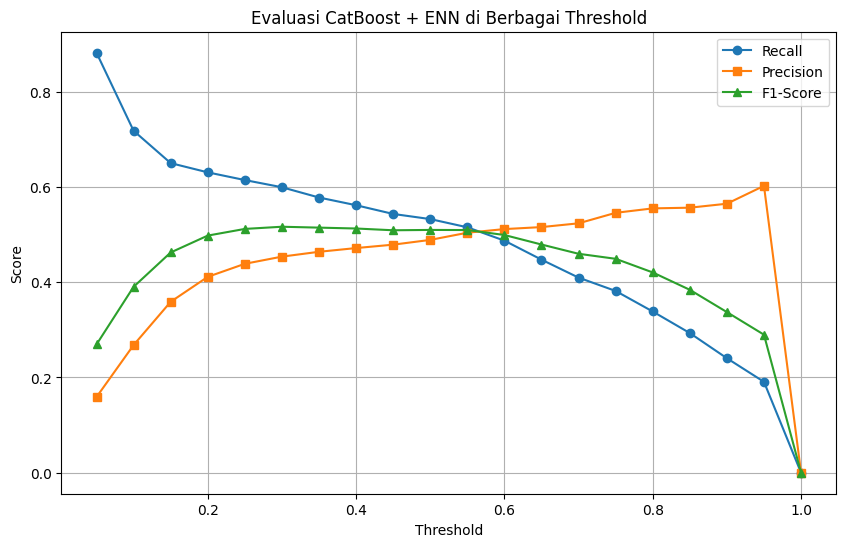

    Threshold    Recall  Precision  F1-Score
0        0.05  0.881466   0.158835  0.269167
1        0.10  0.717672   0.267900  0.390158
2        0.15  0.649784   0.358715  0.462246
3        0.20  0.630388   0.411103  0.497661
4        0.25  0.614224   0.438462  0.511670
5        0.30  0.599138   0.453507  0.516249
6        0.35  0.577586   0.463668  0.514395
7        0.40  0.561422   0.471493  0.512543
8        0.45  0.543103   0.478632  0.508834
9        0.50  0.532328   0.488625  0.509541
10       0.55  0.515086   0.503688  0.509323
11       0.60  0.487069   0.511312  0.498896
12       0.65  0.447198   0.515528  0.478938
13       0.70  0.409483   0.523416  0.459492
14       0.75  0.381466   0.545455  0.448954
15       0.80  0.338362   0.554770  0.420348
16       0.85  0.293103   0.556237  0.383910
17       0.90  0.240302   0.564557  0.337113
18       0.95  0.190733   0.602041  0.289689
19       1.00  0.000000   0.000000  0.000000

Best Threshold for F1: 0.30


In [ ]:
# Resampling pakai ENN
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)

# Inisialisasi dan latih CatBoost
catboost_model = CatBoostClassifier(
    random_state=42,
    verbose=0,
    allow_writing_files=False
)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Prediksi probabilitas
y_test_prob = catboost_model.predict_proba(X_test)[:, 1]

# Range threshold
thresholds = np.arange(0.05, 1.05, 0.05)

# Simpan metrik
metrics = {
    "Threshold": [],
    "Recall": [],
    "Precision": [],
    "F1-Score": []
}

# Hitung metrik di tiap threshold
for threshold in thresholds:
    y_pred = (y_test_prob >= threshold).astype(int)
    metrics["Threshold"].append(threshold)
    metrics["Recall"].append(recall_score(y_test, y_pred, zero_division=0))
    metrics["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, zero_division=0))

# Konversi ke DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(metrics["Threshold"], metrics["Recall"], marker='o', label="Recall")
plt.plot(metrics["Threshold"], metrics["Precision"], marker='s', label="Precision")
plt.plot(metrics["Threshold"], metrics["F1-Score"], marker='^', label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Evaluasi CatBoost + ENN di Berbagai Threshold")
plt.legend()
plt.grid()
plt.show()

# Tampilkan tabel
print(metrics_df)

# Threshold terbaik berdasarkan F1
best_threshold = metrics_df.loc[metrics_df["F1-Score"].idxmax(), "Threshold"]
print(f"\nBest Threshold for F1: {best_threshold:.2f}")


Meskipun threshold **0.30 menghasilkan F1 Score tertinggi (0.5162)**, keputusan akhir memilih threshold **0.45** karena alasan berikut:

1. **Keseimbangan Precision–Recall**:
   Threshold 0.45 menghasilkan:

   * **Recall**: 0.5431 (masih tinggi)
   * **Precision**: 0.4786 (lebih tinggi dibanding threshold 0.30)
   * **F1 Score**: 0.5088 (sedikit di bawah nilai maksimal, namun lebih stabil)

2. **Keseimbangan Operasional**:
   Pada threshold yang terlalu rendah (misal 0.30), model memang berhasil menangkap lebih banyak positif (recall tinggi), **namun terlalu banyak false positive** yang membuat precision jatuh. Ini **tidak ideal untuk cost-efficiency** dalam kampanye marketing.

3. **Justifikasi Bisnis**:
   Dengan threshold 0.45, model mampu **mengidentifikasi lebih sedikit target**, tapi dengan tingkat keakuratan yang lebih tinggi — **menghindari pemborosan sumber daya pada prospek yang salah sasaran.**

> Meskipun threshold 0.30 memberikan skor F1 tertinggi, threshold **0.45 dipilih sebagai final threshold** karena memberikan **kompromi yang seimbang antara recall dan precision**, serta mempertimbangkan **kestabilan performa dan efisiensi bisnis** dalam konteks pemasaran langsung.

Model dengan threshold ini lebih siap diterapkan secara nyata, karena tidak hanya unggul secara teknis, tetapi juga mempertimbangkan **dampak praktis dan biaya dari setiap prediksi positif**.

## Finalisasi Model

In [28]:
# 1. Split Data
X = df_model.drop('deposit', axis=1)
y = df_model['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. ColumnTransformer (Feature Engineering)
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), ['education']),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
     ['marital', 'housing', 'loan', 'contact', 'pdays_group', 'previous', 'poutcome']),
    ('binary', BinaryEncoder(), ['job', 'month', 'day_of_week']),
    ('scaler', RobustScaler(), ['age','campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'])
])

# Fit & simpan transformer
transformer.fit(X_train)
joblib.dump(transformer, './Model/transformer.joblib')
print("Preprocessor disimpan ke 'transformer.joblib'!")

# 3. Transformasi data
X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

# 4. Resampling dengan ENN
enn = EditedNearestNeighbours()
X_train_resampled, y_train_resampled = enn.fit_resample(X_train_transformed, y_train)

# 5. Train CatBoost with tuned hyperparameters
catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=7,
    l2_leaf_reg=5,
)

catboost_model.fit(X_train_resampled, y_train_resampled)

# 6. Predict Probabilities (for threshold tuning if needed)
y_test_proba = catboost_model.predict_proba(X_test_transformed)[:, 1]

# 7. Apply Best Threshold (0.45)
y_test_pred = (y_test_proba >= 0.45).astype(int)


Preprocessor disimpan ke 'transformer.joblib'!
0:	learn: 0.5942853	total: 184ms	remaining: 36.7s
1:	learn: 0.5267862	total: 198ms	remaining: 19.6s
2:	learn: 0.4666575	total: 212ms	remaining: 13.9s
3:	learn: 0.4236212	total: 223ms	remaining: 10.9s
4:	learn: 0.3928603	total: 233ms	remaining: 9.07s
5:	learn: 0.3653624	total: 241ms	remaining: 7.78s
6:	learn: 0.3471363	total: 248ms	remaining: 6.85s
7:	learn: 0.3298155	total: 256ms	remaining: 6.15s
8:	learn: 0.3164286	total: 264ms	remaining: 5.6s
9:	learn: 0.3058706	total: 272ms	remaining: 5.16s
10:	learn: 0.2972384	total: 279ms	remaining: 4.79s
11:	learn: 0.2910718	total: 286ms	remaining: 4.49s
12:	learn: 0.2858943	total: 294ms	remaining: 4.22s
13:	learn: 0.2821232	total: 301ms	remaining: 4s
14:	learn: 0.2783600	total: 309ms	remaining: 3.81s
15:	learn: 0.2758403	total: 317ms	remaining: 3.64s
16:	learn: 0.2729728	total: 324ms	remaining: 3.49s
17:	learn: 0.2708304	total: 332ms	remaining: 3.36s
18:	learn: 0.2688632	total: 340ms	remaining: 3.24

### Classification Report & F1 Score

In [29]:
print(classification_report(y_test, y_test_pred))
print(f'F1 Score: {f1_score(y_test, y_test_pred):.4f}')

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7308
           1       0.48      0.56      0.52       928

    accuracy                           0.88      8236
   macro avg       0.71      0.74      0.73      8236
weighted avg       0.89      0.88      0.89      8236

F1 Score: 0.5170


### Confusion Matrix (Angka Asli)

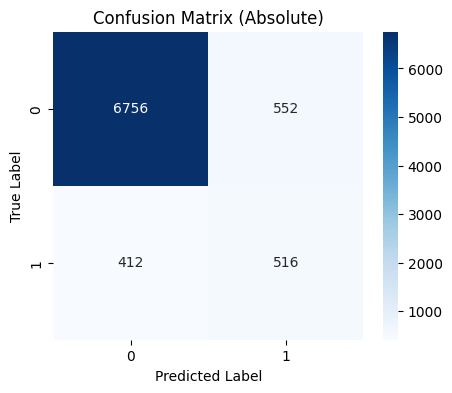

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Absolute)")
plt.show()

### Confusion Matrix (Persentase)

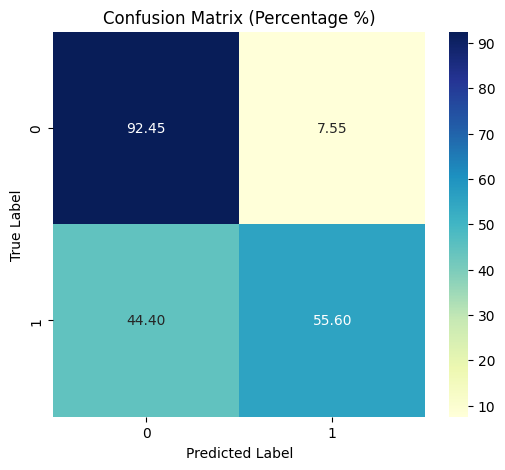

In [31]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage %)")
plt.show()

### Save Model

In [32]:
# Pastikan model_data berbentuk dictionary
model_dict = {
    "model": catboost_model,
    "threshold": 0.30
}

# Simpan ulang dengan format dictionary
with open("./Model/best_model.pkl", "wb") as file:
    pickle.dump(model_dict, file)

print("Model disimpan ulang dengan format dictionary!")

Model disimpan ulang dengan format dictionary!


# Conclusion and Recommendation


## Kesimpulan

Proyek ini berfokus pada peningkatan efisiensi dan profitabilitas kampanye telemarketing deposito Bank Novobanco, yang saat ini memiliki tingkat konversi rendah (~11.8%). Melalui pendekatan analitis yang memanfaatkan data historis, kita dapat membangun model prediktif yang mengidentifikasi nasabah potensial.

Analisis awal menunjukkan bahwa:
* **Ketidakseimbangan kelas** pada variabel target (`y`) menjadi tantangan utama, memerlukan penanganan khusus seperti ENN yang kami pakai.
* Fitur seperti **`poutcome` (success), `contact` (cellular), dan `month` (Maret, Oktober, Desember)** adalah prediktor kunci yang menunjukkan pola konversi lebih tinggi.
* Demografi nasabah seperti **`job` (retired, student)** juga berkorelasi dengan konversi yang lebih baik.
* Terdapat **isu data** seperti **data leakage** (`duration`), **missing* values* (`unknown`), **duplikasi**, **outlier**, dan **multikolinearitas** yang perlu ditangani secara sistematis.

Dengan menargetkan **F1-Score** sebagai metrik evaluasi utama, model akan berusaha menyeimbangkan antara mengidentifikasi nasabah yang benar-benar akan membuka deposito (tinggi Recall) dan memastikan akurasi prediksi positif (tinggi Precision). Ini krusial karena biaya kerugian False Negative (kehilangan potensi pendapatan $\approx$ €40.28 per nasabah) jauh lebih besar dibandingkan False Positive (biaya marketing terbuang $\approx$ €0.39 per nasabah). Optimalisasi F1-Score akan membantu meminimalkan kedua jenis kerugian ini secara proporsional.

## Rekomendasi

Berdasarkan temuan dan tujuan yang ditetapkan, berikut adalah rekomendasi strategis untuk Bank Novobanco:

1.  **Pengembangan Model Prediktif Konversi**:
    * **Prioritaskan pembangunan model klasifikasi** (misalnya, menggunakan algoritma seperti Random Forest, Gradient Boosting, atau Logistic Regression) untuk memprediksi probabilitas nasabah melakukan deposito.
    * **Terapkan teknik penanganan ketidakseimbangan kelas** (misalnya, SMOTE, ADASYN, ENN dll) pada fase **preprocessing** untuk memastikan model dapat belajar secara efektif dari minoritas kelas 'yes'.
    * **Gunakan F1-Score** sebagai metrik utama untuk evaluasi model, diikuti oleh Recall dan Precision, untuk memastikan keseimbangan antara menangkap nasabah potensial dan menjaga efisiensi biaya.

2.  **Optimalisasi Strategi Kampanye Telemarketing**:
    * **Penargetan Berbasis Model**: Gunakan daftar nasabah yang diprediksi "potensial" oleh model sebagai prioritas utama untuk dihubungi oleh tim telemarketing. Ini akan mengurangi jumlah panggilan ke nasabah yang tidak tertarik, menghemat waktu dan biaya.
    * **Pemanfaatan Insight Fitur**:
        * **Metode Kontak**: Prioritaskan kontak melalui **`cellular`** karena terbukti lebih efektif.
        * **Waktu Kontak**: Pusatkan upaya telemarketing pada bulan-bulan dengan tingkat konversi tinggi, yaitu **Maret, Oktober, dan Desember**.
        * **Riwayat Kampanye**: Berikan perhatian khusus pada nasabah dengan `poutcome = success` dari kampanye sebelumnya.
        * **Segmentasi Demografi**: Prioritaskan segmen `management`, `Technician` dan `Entrepreneur` yang menunjukkan probabilitas konversi lebih tinggi.
    * **Eliminasi Data Leakage**: Pastikan fitur `duration` dihapus dari dataset sebelum pelatihan model untuk menghindari *data leakage* dan memastikan model prediktif dapat bekerja secara real-time (sebelum panggilan dilakukan).

3.  **Manajemen Data yang Lebih Baik**:
    * **Penanganan 'Unknown'**: Lakukan imputasi yang tepat untuk nilai 'unknown' pada fitur kategorikal (`education`, `job`, `housing`, `loan`, `default`). Untuk `poutcome` (sebagian besar 'nonexistent'), pertimbangkan untuk menjadikannya kategori tersendiri atau fitur biner (`has_previous_campaign_record`).
    * **Penanganan Outlier**: Terapkan metode capping (IQR) atau transformasi logaritmik untuk fitur numerik yang memiliki outlier ekstrem (`age`, `campaign`, `previous`) agar tidak bias model.
    * **Atasi Multikolinearitas**: Gunakan teknik seperti PCA atau pemilihan fitur (`feature selection`) untuk mengatasi multikolinearitas antar fitur makroekonomi (`emp.var.rate`, `euribor3m`, `nr.employed`) guna meningkatkan interpretasi model dan mengurangi redundansi.

4.  **Validasi Eksternal dan Pembaruan Model Berkelanjutan**:
    * Meskipun data berasal dari 2008-2013, wawasan dari fitur makroekonomi dapat dikaitkan dengan riset tren ekonomi global (ECB, OECD) untuk memberikan konteks historis.
    * Setelah model diterapkan, penting untuk **memantau kinerjanya secara berkelanjutan** dan melakukan **retraining** model secara berkala dengan data terbaru. Kondisi pasar dan perilaku nasabah dapat berubah, sehingga model perlu diadaptasi untuk menjaga akurasinya.

Dengan mengimplementasikan rekomendasi ini, Bank Novobanco dapat secara signifikan meningkatkan efisiensi kampanye telemarketing mereka, mengoptimalkan penggunaan anggaran marketing, dan pada akhirnya, mencapai tujuan profitabilitas yang lebih tinggi melalui peningkatan konversi deposito.